#Jamboree Business Case- Linear Regression

###From company’s perspective:

* Jamboree is a renowned educational institution that has successfully assisted numerous students in gaining admission to top colleges abroad. With their proven
problem-solving methods, they have helped students achieve exceptional scores on
exams like GMAT, GRE, and SAT with minimal effort.
* To further support students, Jamboree has recently introduced a new feature on their website. This feature enables students to assess their probability of admission to Ivy League colleges, considering the unique perspective of Indian applicants.
* By conducting a thorough analysis, we can assist Jamboree in understanding the crucial factors impacting graduate admissions and their interrelationships. Additionally, we can provide predictive insights to determine an individual's admission chances based on various variables.

###From learner’s perspective:
* Solving this business case holds immense importance for aspiring data scientists and ML engineers.
* Building predictive models using machine learning is widely popular among the data scientists/ML engineers. By working through this case study, individuals gain hands-on experience and practical skills in the field.
* Additionally, it will enhance one's ability to communicate with the stakeholders involved in data-related projects and help the organization take better, data-driven decisions.
____________________________________________________________________________

#### Importing all the necessary libraries -->

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
import warnings
warnings.filterwarnings('ignore')

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [100]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Importing the Jamboree Dataset -->

In [101]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv -O 'data.csv'

--2024-08-02 14:27:00--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 3.162.130.111, 3.162.130.97, 3.162.130.189, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|3.162.130.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16176 (16K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]  15.80K  --.-KB/s    in 0.002s  

2024-08-02 14:27:00 (9.41 MB/s) - ‘data.csv’ saved [16176/16176]



In [102]:
df=pd.read_csv('data.csv')

###1. Problem Statement: To determine the probability of a student gettig admission in preferred Ivy league college by assessing various factor variables such as GRE score, TOEFL score, GPA, Reasearch experience and other independent variables affecting the chance of admission.
Our goal is to analyse the given Jamboree dataset and build a predictive model using Linear Regression that predicts an applicant's chance of getting admission in to the Ivy league schools as desired.

We need to assess all the features given in the dataset, determine the dependent and independent variables, and observe how the independent features are affecting the dependent Target variable.

###2. Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset.

○ Drop any irrelevant column present in the dataset.

○ Check the shape of the dataset provided.

○ Check the data type of each column.

○ Comment on the range of attributes.

○ Display the statistical summary of the entire dataset.

In [103]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [104]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [105]:
#Check the data type of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [106]:
#Comment on the range of attributes and Display the statistical summary of the entire dataset.
df.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


* GRE Score ranges from 290 to 340 in this dataset
* TOEFL score ranges from 92 to 120 in this dataset
* University Rating, SOP, LOR ranges from 1 to 5 in this dataset
* CGPA ranges from 6.8 to 9.92 in this dataset
* Maximum number of applicants have had Research experience as analysed from the dataset.
* Chance of Admit, being the dependent variable can range from 0 to 1, since it esimates the probability/ chance of applicant getting admission into Ivy league School.

In [107]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [108]:
#Check the shape of the dataset provided.
df.shape

(500, 9)

#### Dropping Serial No. column since it does not have any relevance to how the Chance of Admit is calculated, since it is just a unique row identifier column.

In [109]:
#Drop any irrelevant column present in the dataset.
df.drop('Serial No.',axis=1, inplace=True)

In [110]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [112]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [113]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [114]:
#Removing the unnecessary space character from column names:
df.rename(columns={'LOR ':'LOR','Chance of Admit ':'Chance of Admit'}, inplace=True)

In [115]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [116]:
df.shape

(500, 8)

### Insights:
There are a total of 500 data points in the dataset, with 8 total columns. 7 columns are the independent features, 1 column - Chance of Admit is the Target Variable in our dataset.

###3. Use Non-graphical and graphical analysis for getting insights about variables.

○ Perform a Univariate Analysis - Check the distribution of different
continuous/categorical variables.

  i. You could use a histplot, displot or kdeplot.

○ Perform a Bivariate Analysis - Check the relationship between different
variables.

i. You could use a scatter plot, regplot or pairplot.

<Axes: xlabel='GRE Score', ylabel='Count'>

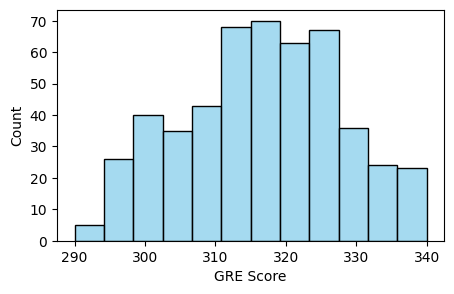

In [117]:
plt.figure(figsize=(5,3))
sns.histplot(data=df, x=df['GRE Score'],color='skyblue')

<Axes: ylabel='Count'>

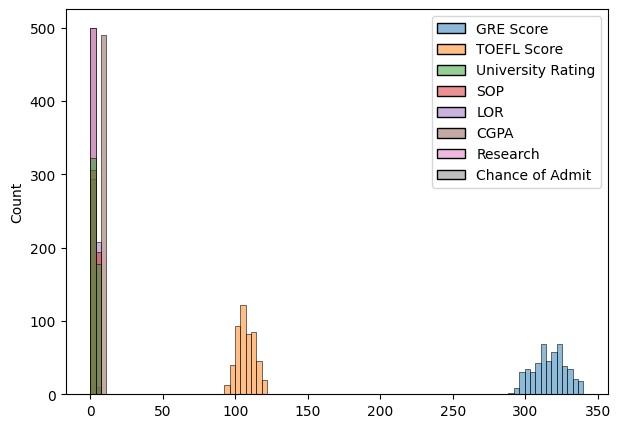

In [118]:
plt.figure(figsize=(7,5))
sns.histplot(data=df)

<Axes: xlabel='University Rating', ylabel='Density'>

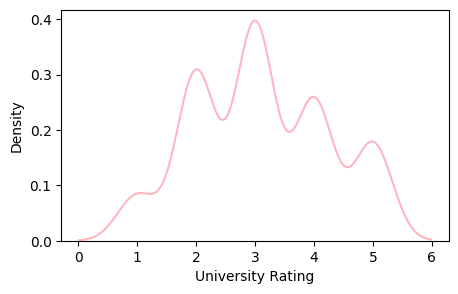

In [119]:
plt.figure(figsize=(5,3))
sns.kdeplot(data=df, x=df['University Rating'],color='lightpink')

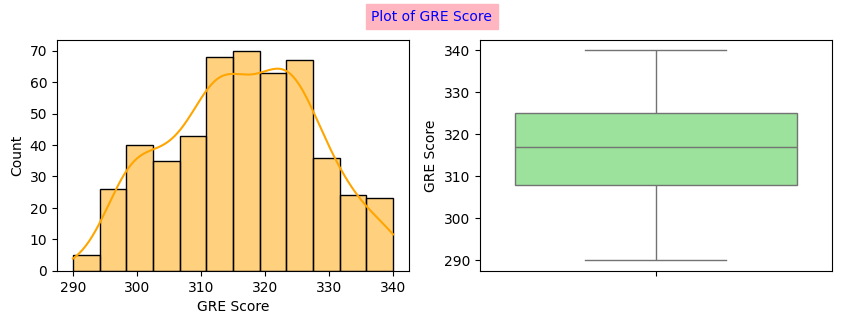

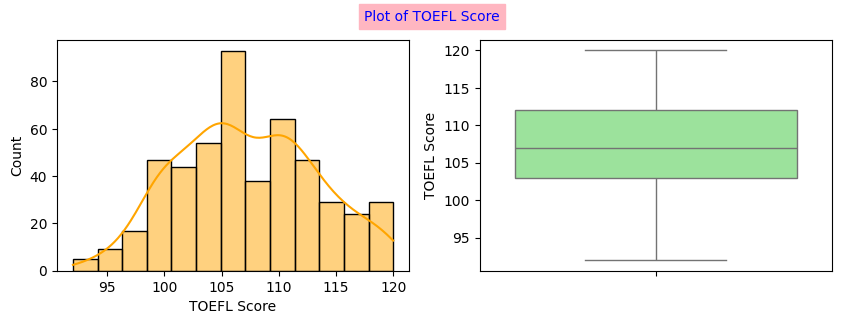

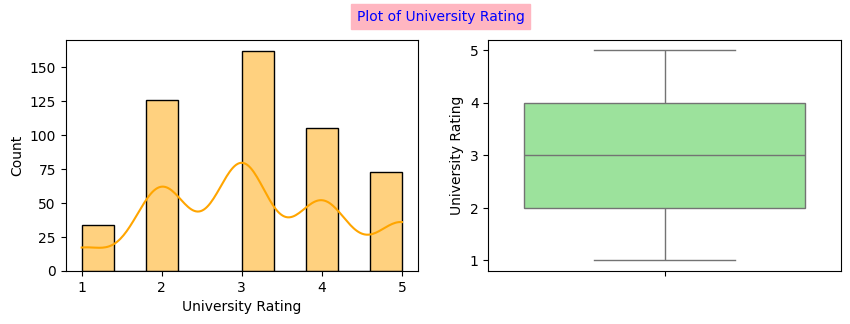

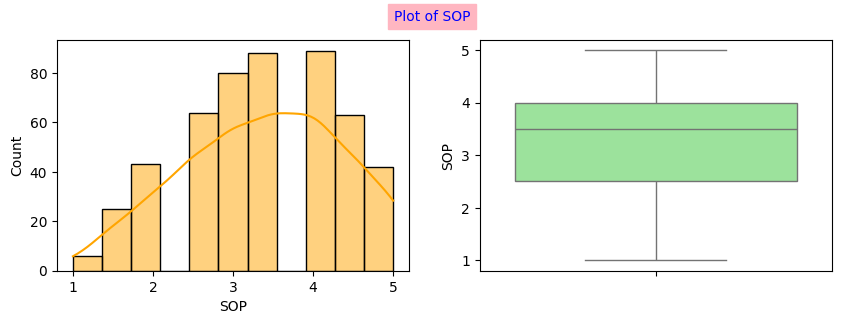

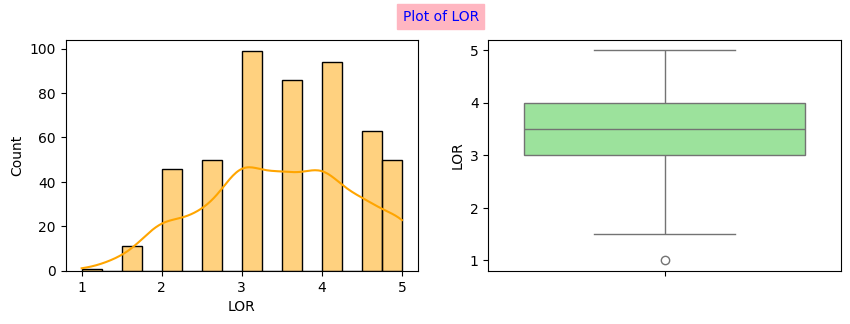

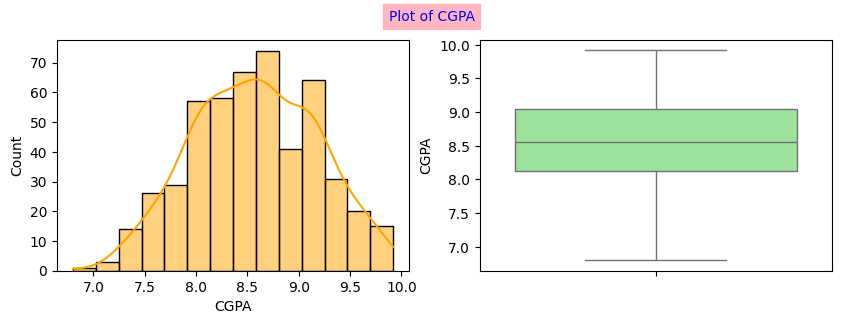

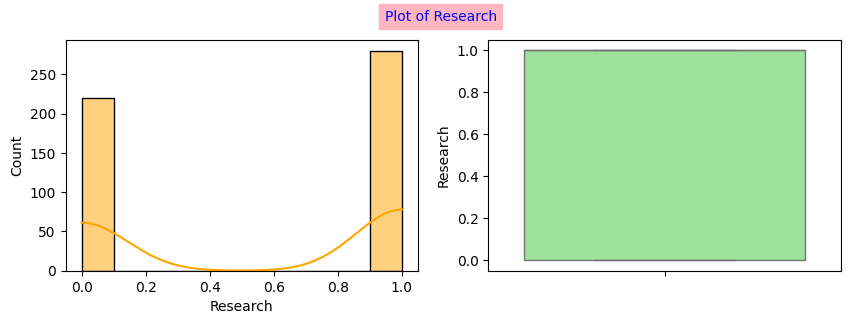

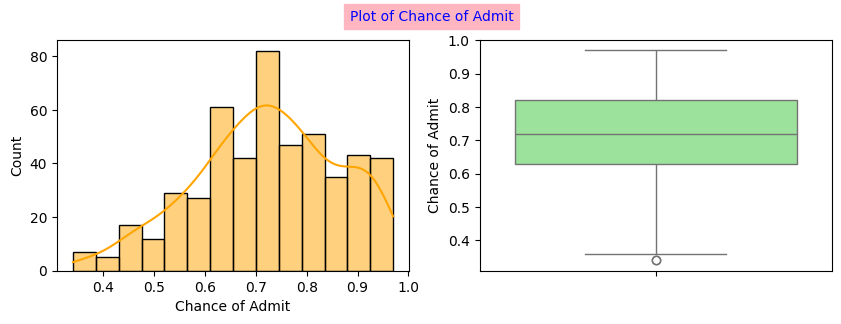

In [120]:
for _ in df.columns:
  plt.figure(figsize=(10,3))
  plt.subplot(121)
  sns.histplot(df[_],kde=True,color='orange')
  plt.subplot(122)
  sns.boxplot(df[_],color='lightgreen')
  plt.suptitle(f'Plot of {_}', fontsize=10, backgroundcolor='lightpink',color='blue')
  plt.show()

<Axes: xlabel='GRE Score', ylabel='TOEFL Score'>

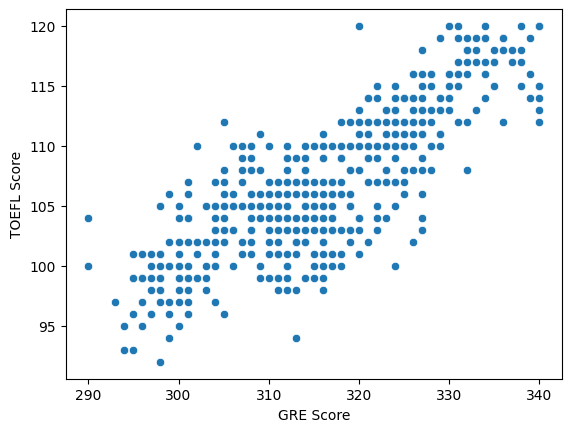

In [121]:
sns.scatterplot(data=df, x='GRE Score', y='TOEFL Score')

### Insights:
GRE Score and TOEFL Score have a linear relationship.

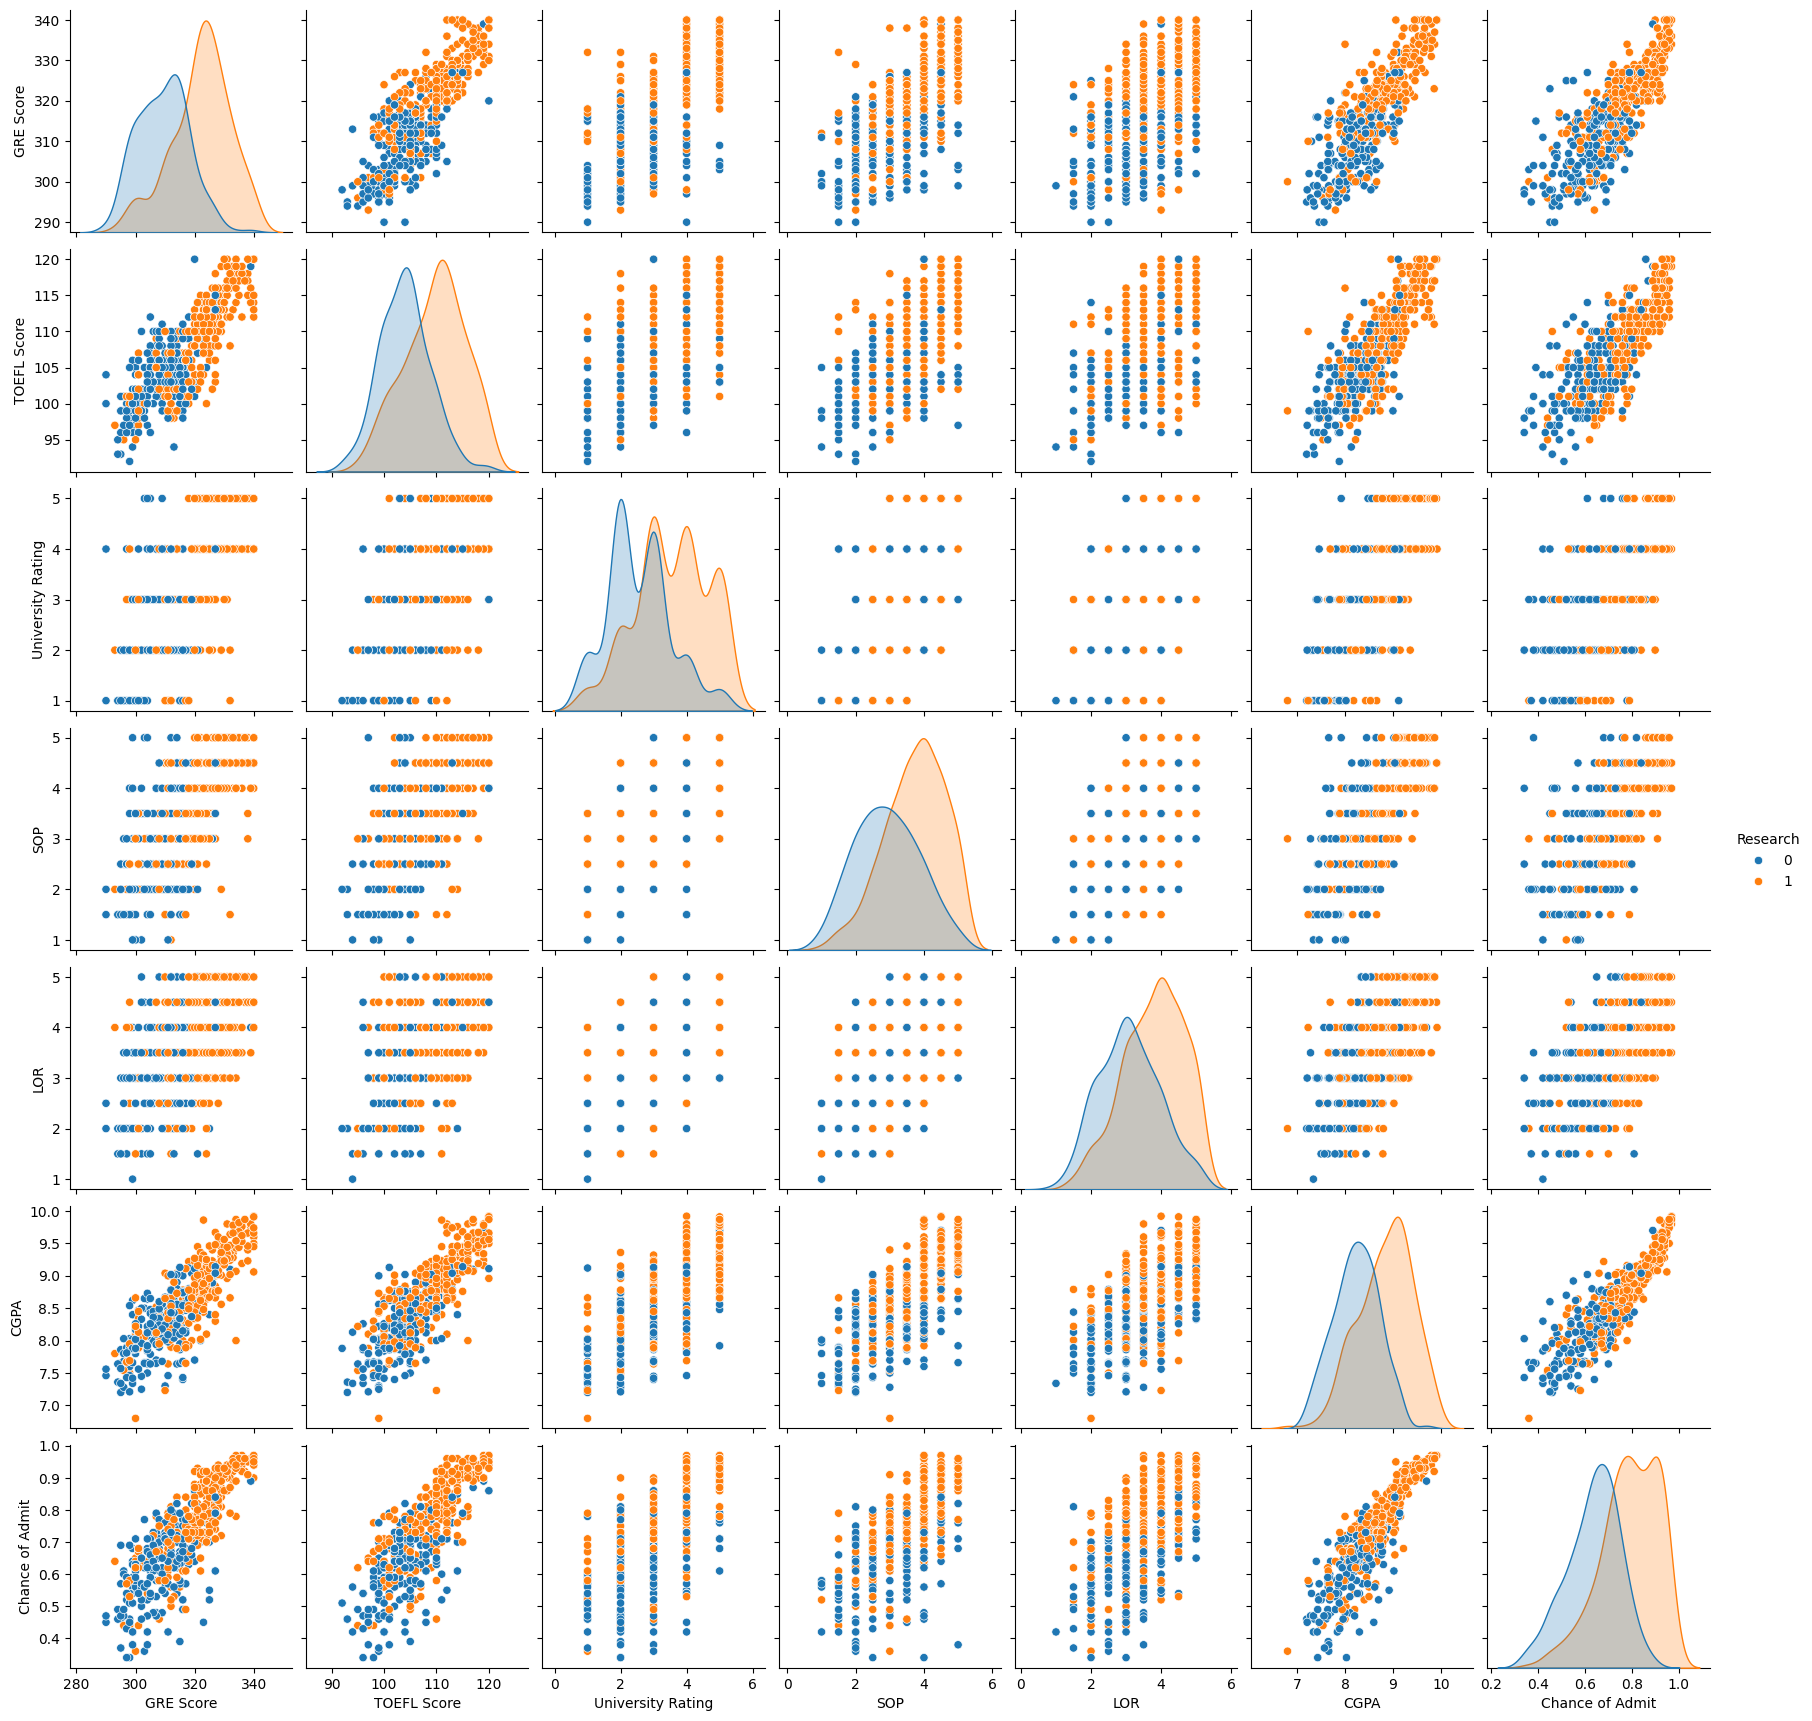

In [122]:
sns.pairplot(df, kind='scatter',hue='Research')

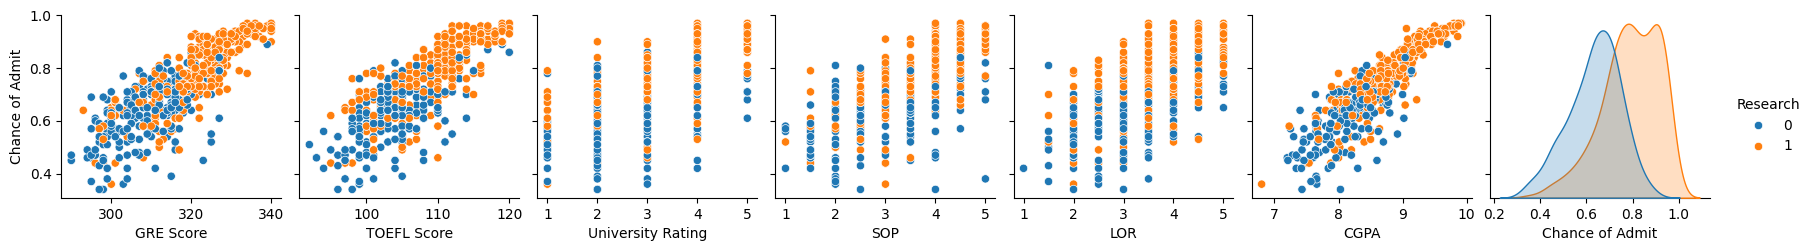

In [123]:
sns.pairplot(df,y_vars='Chance of Admit', kind='scatter',hue='Research')

###Insights:
Chance of Admit is linearly relayed to GRE Score, TOEFL Score, CGPA features.

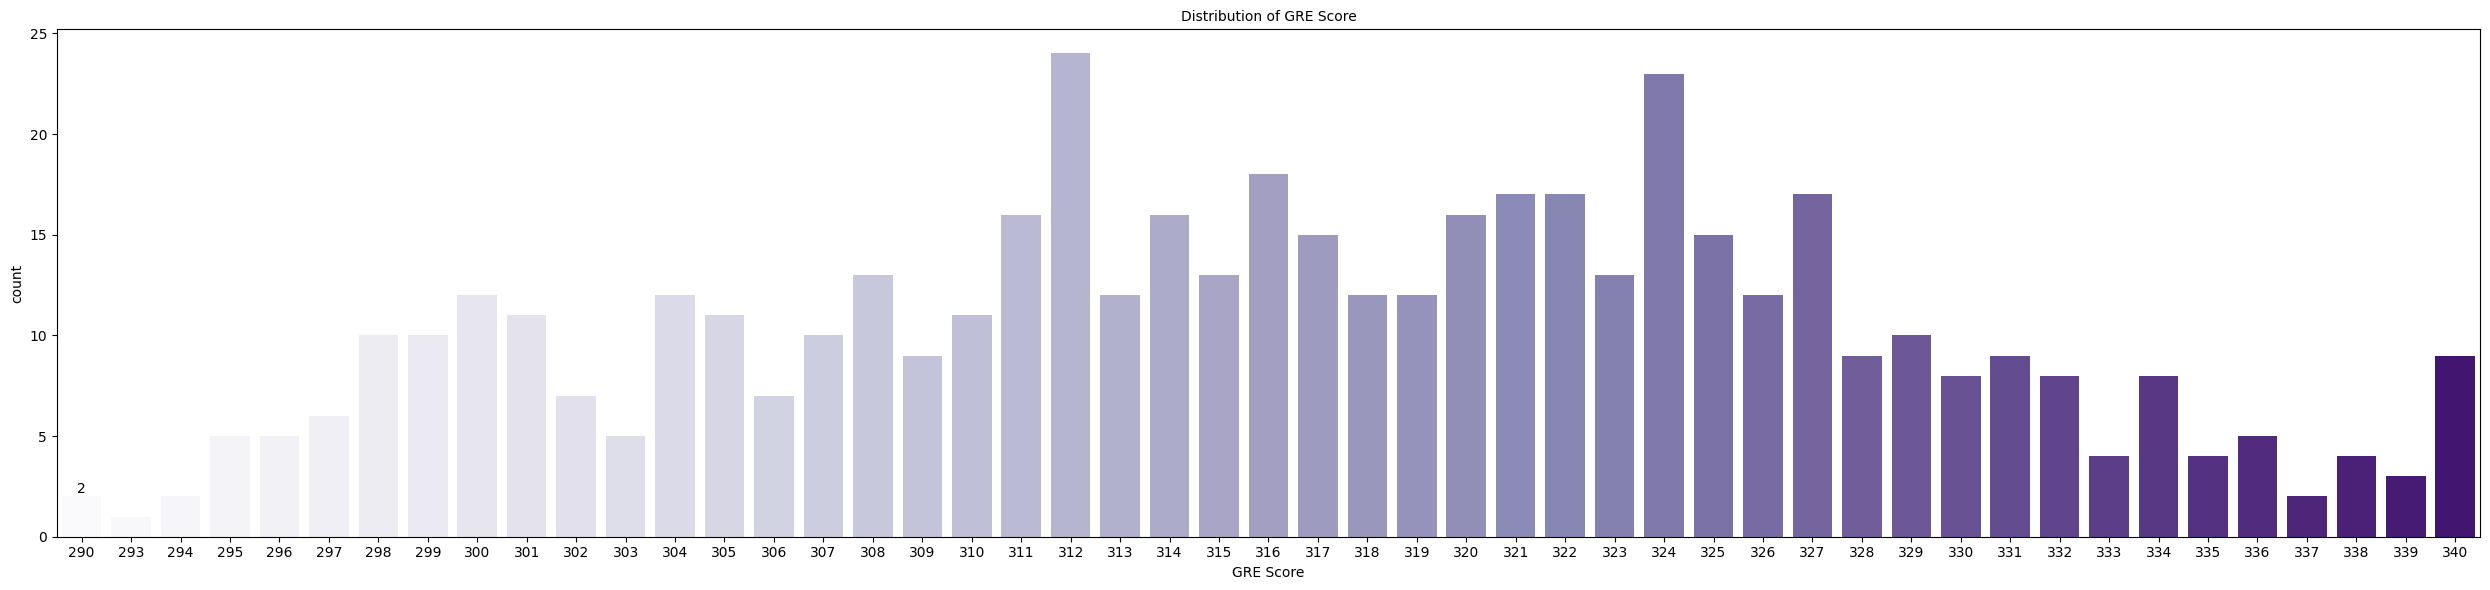

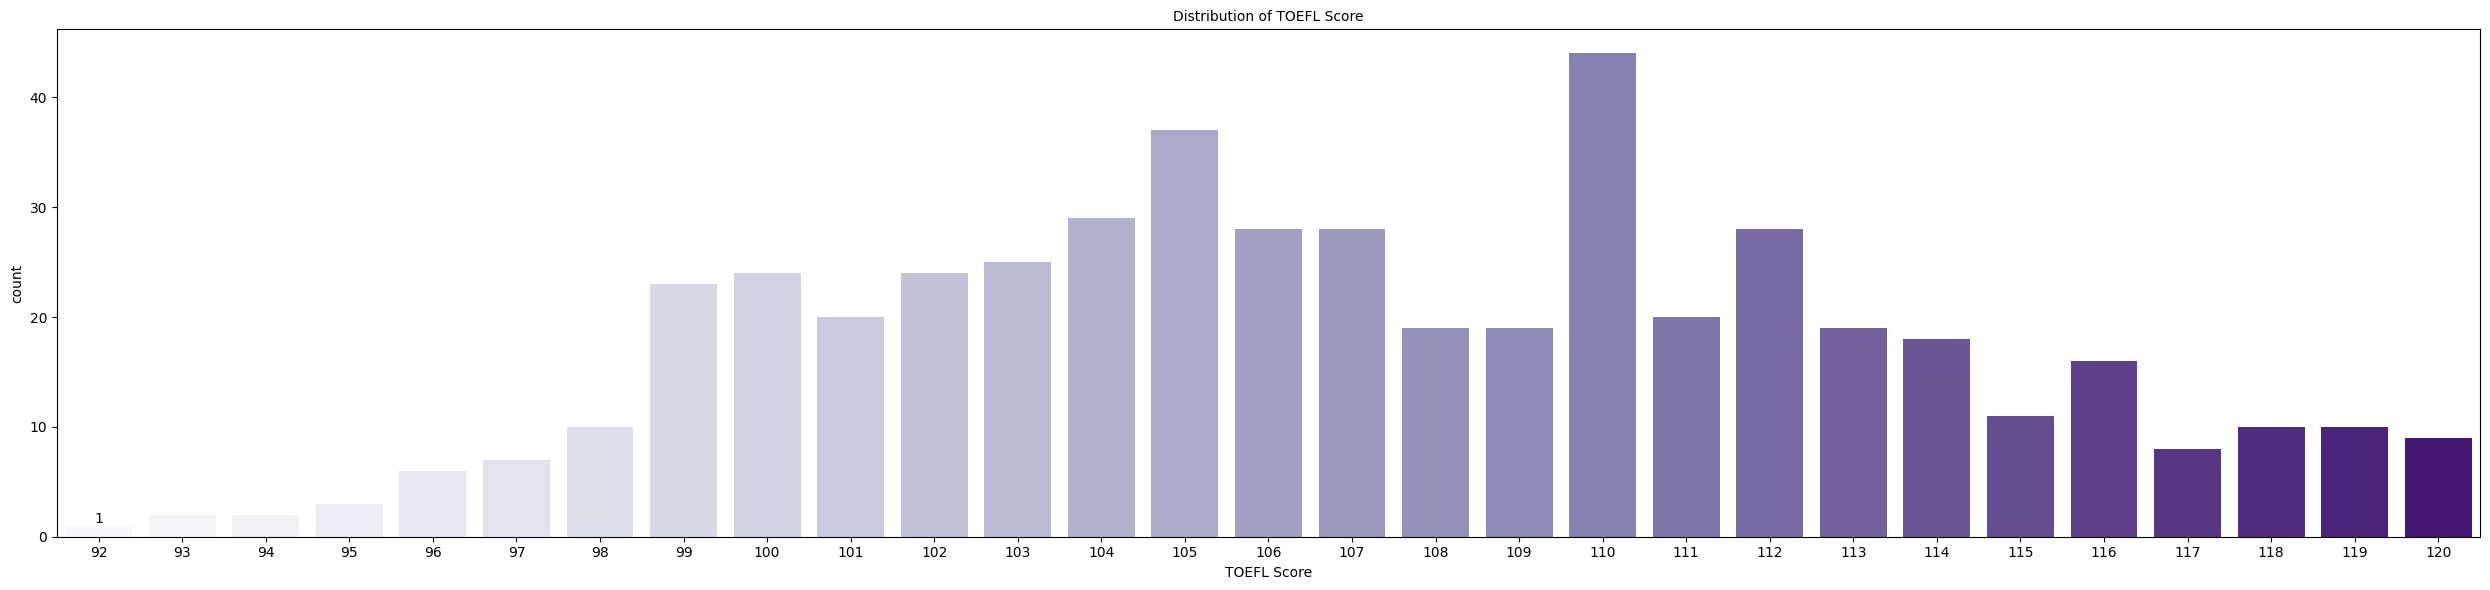

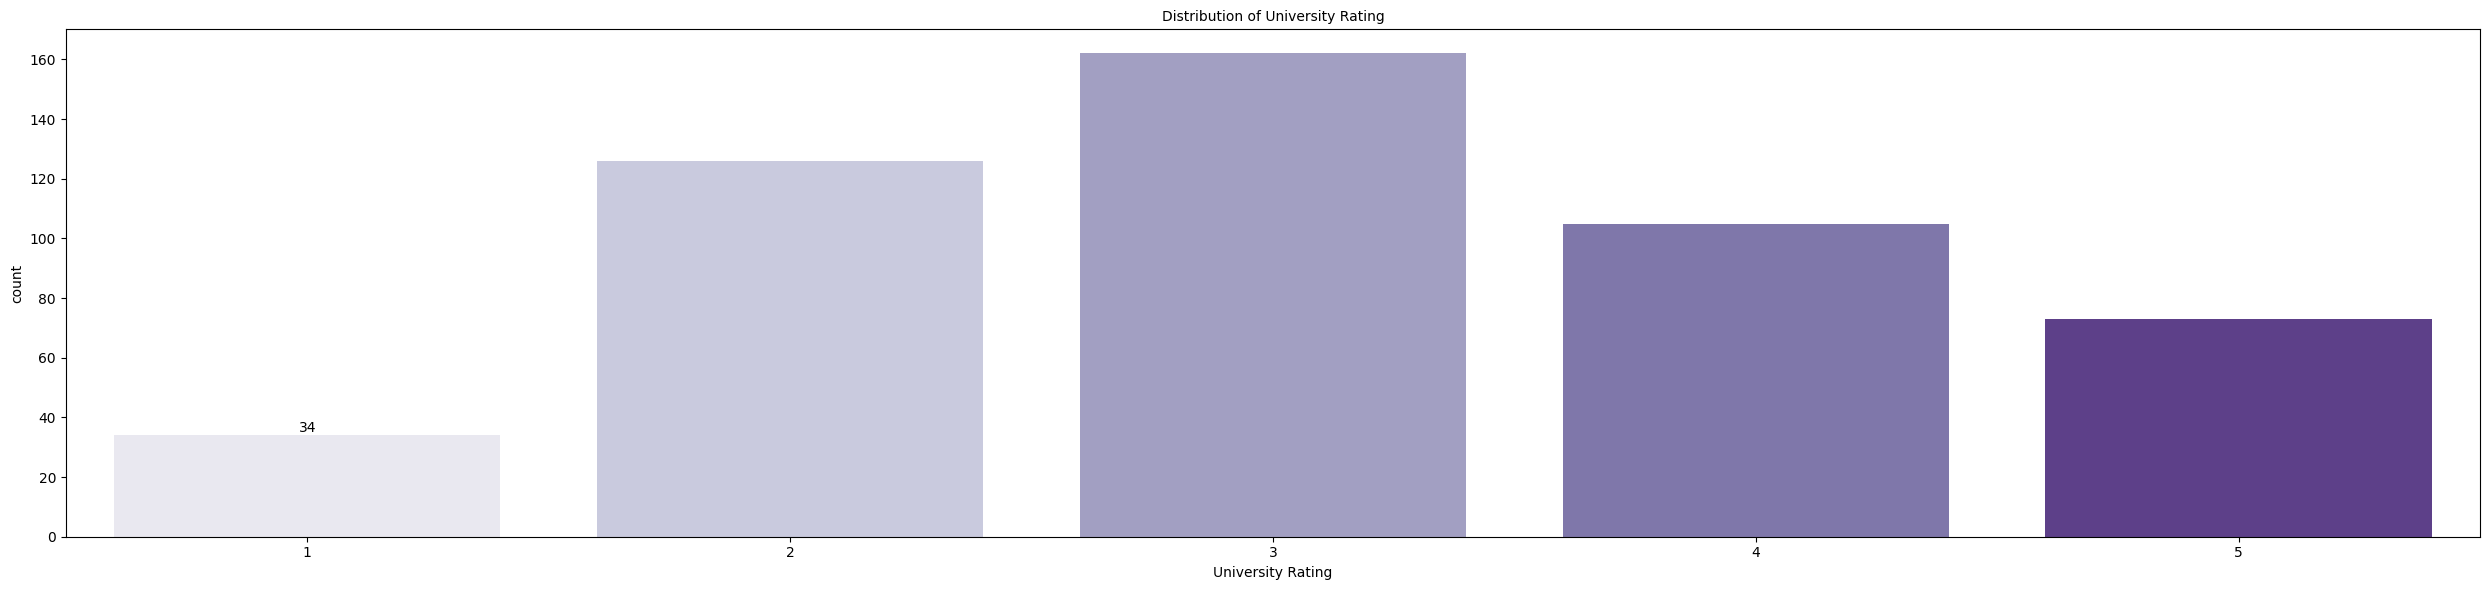

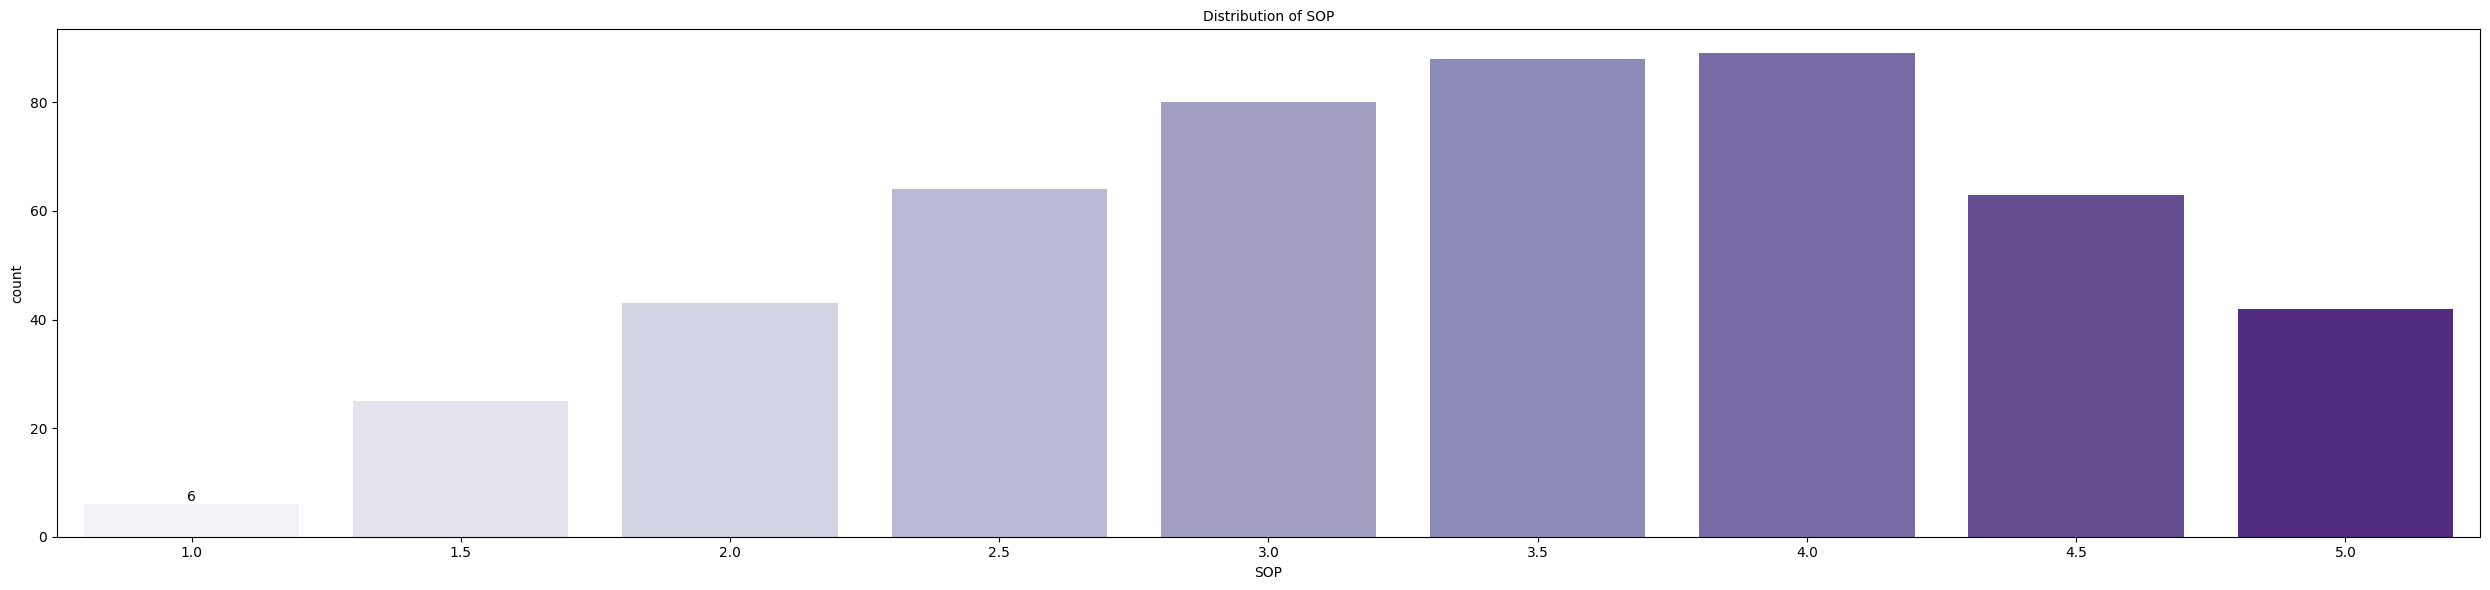

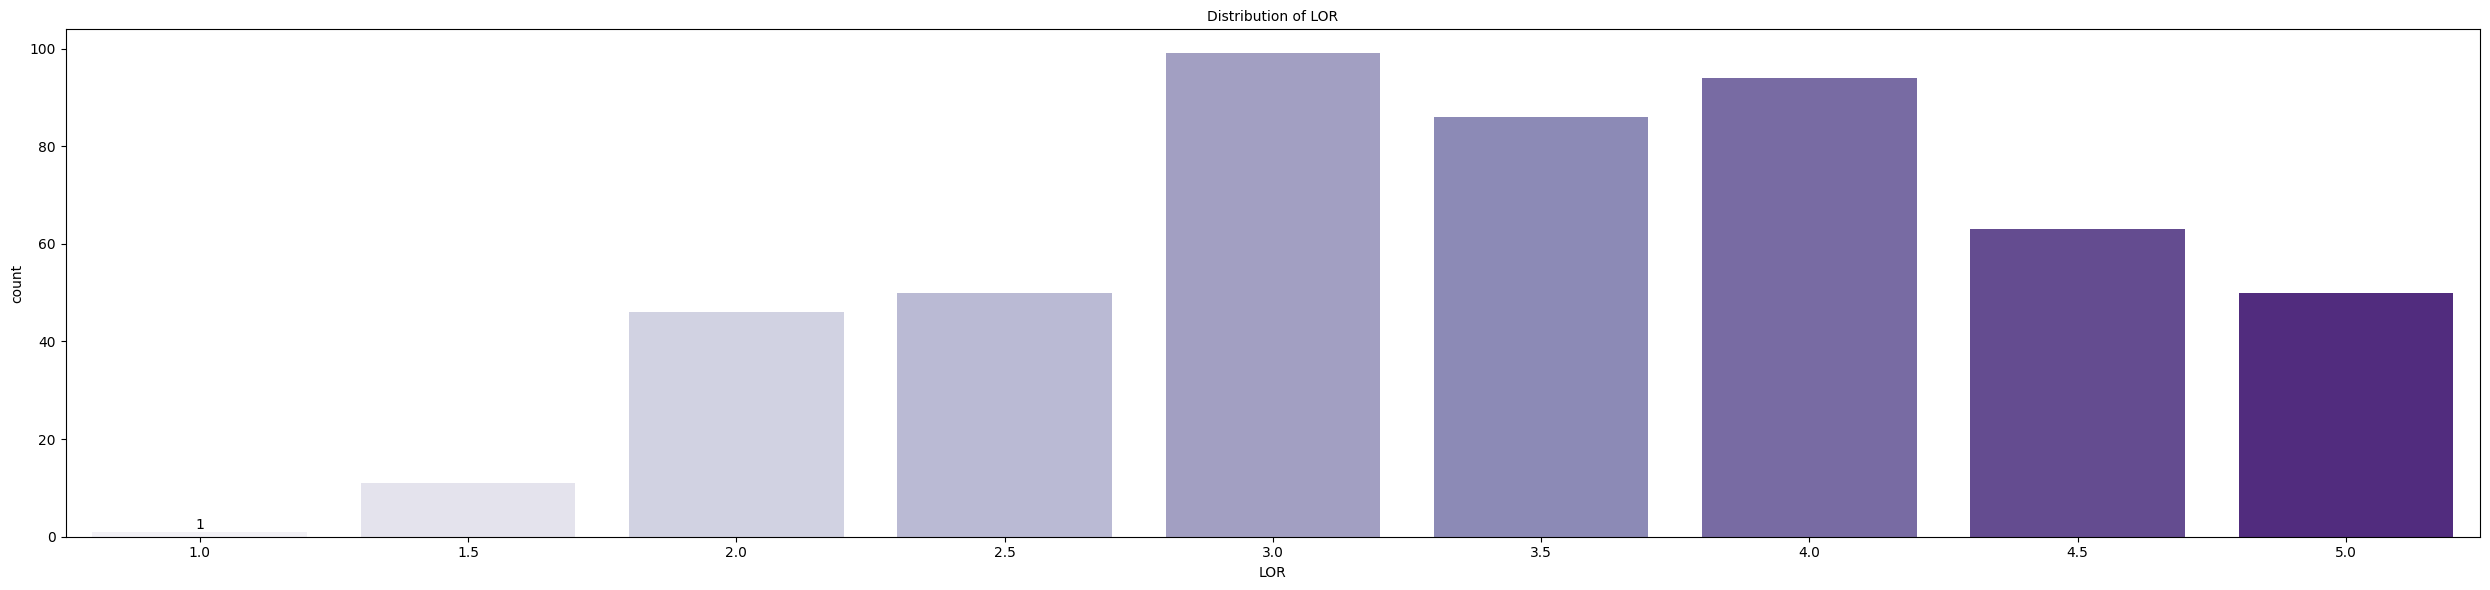

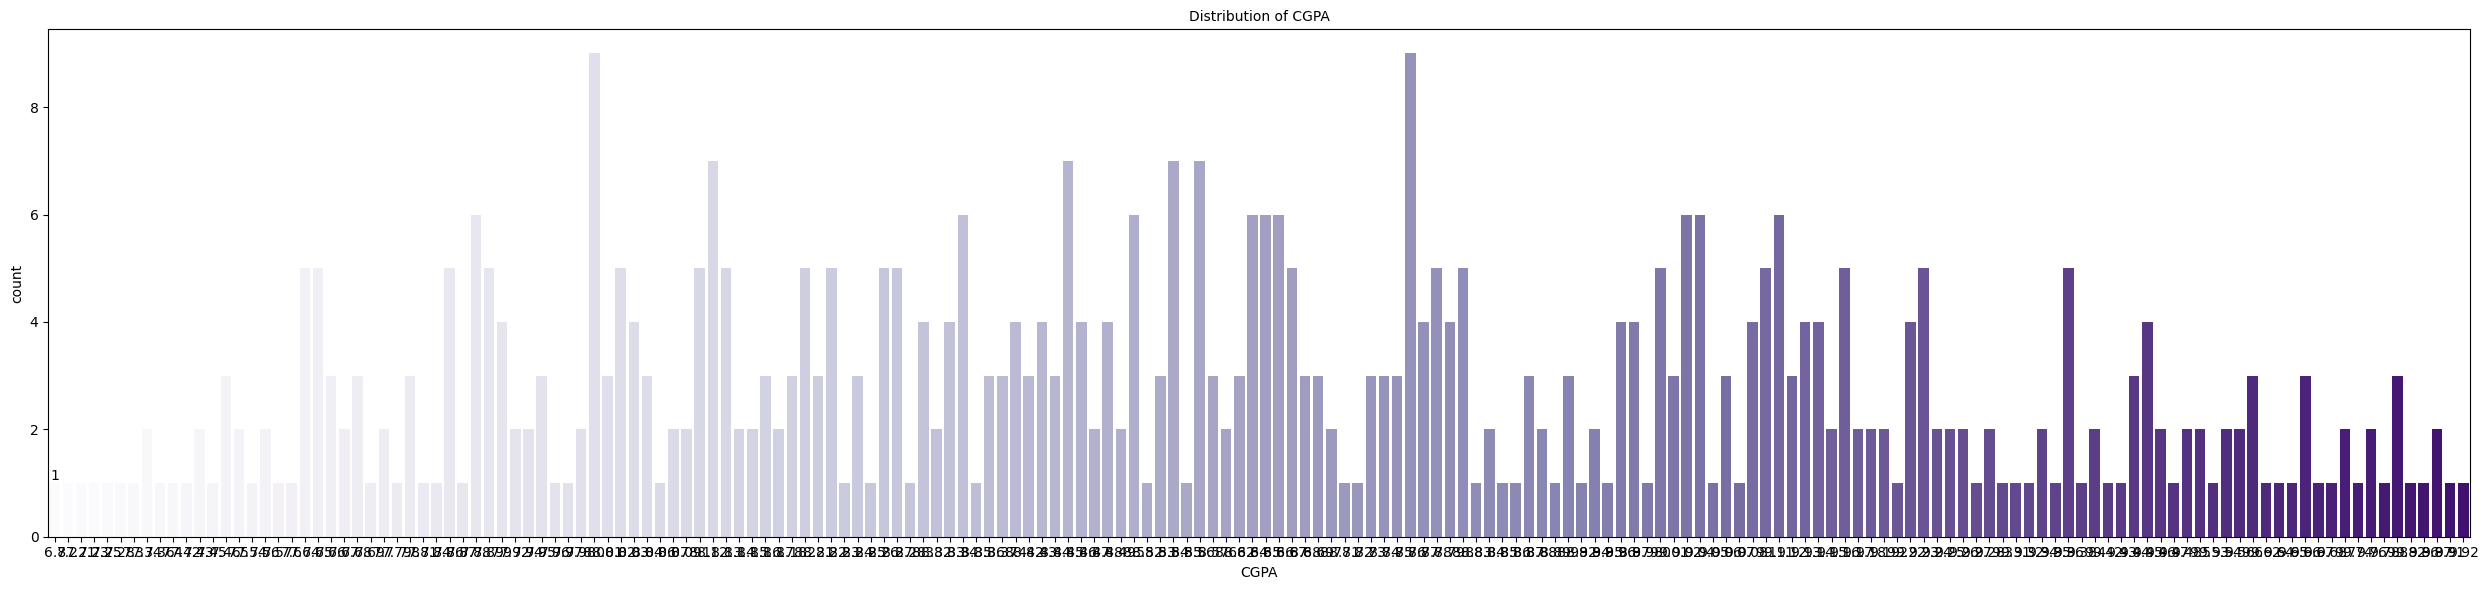

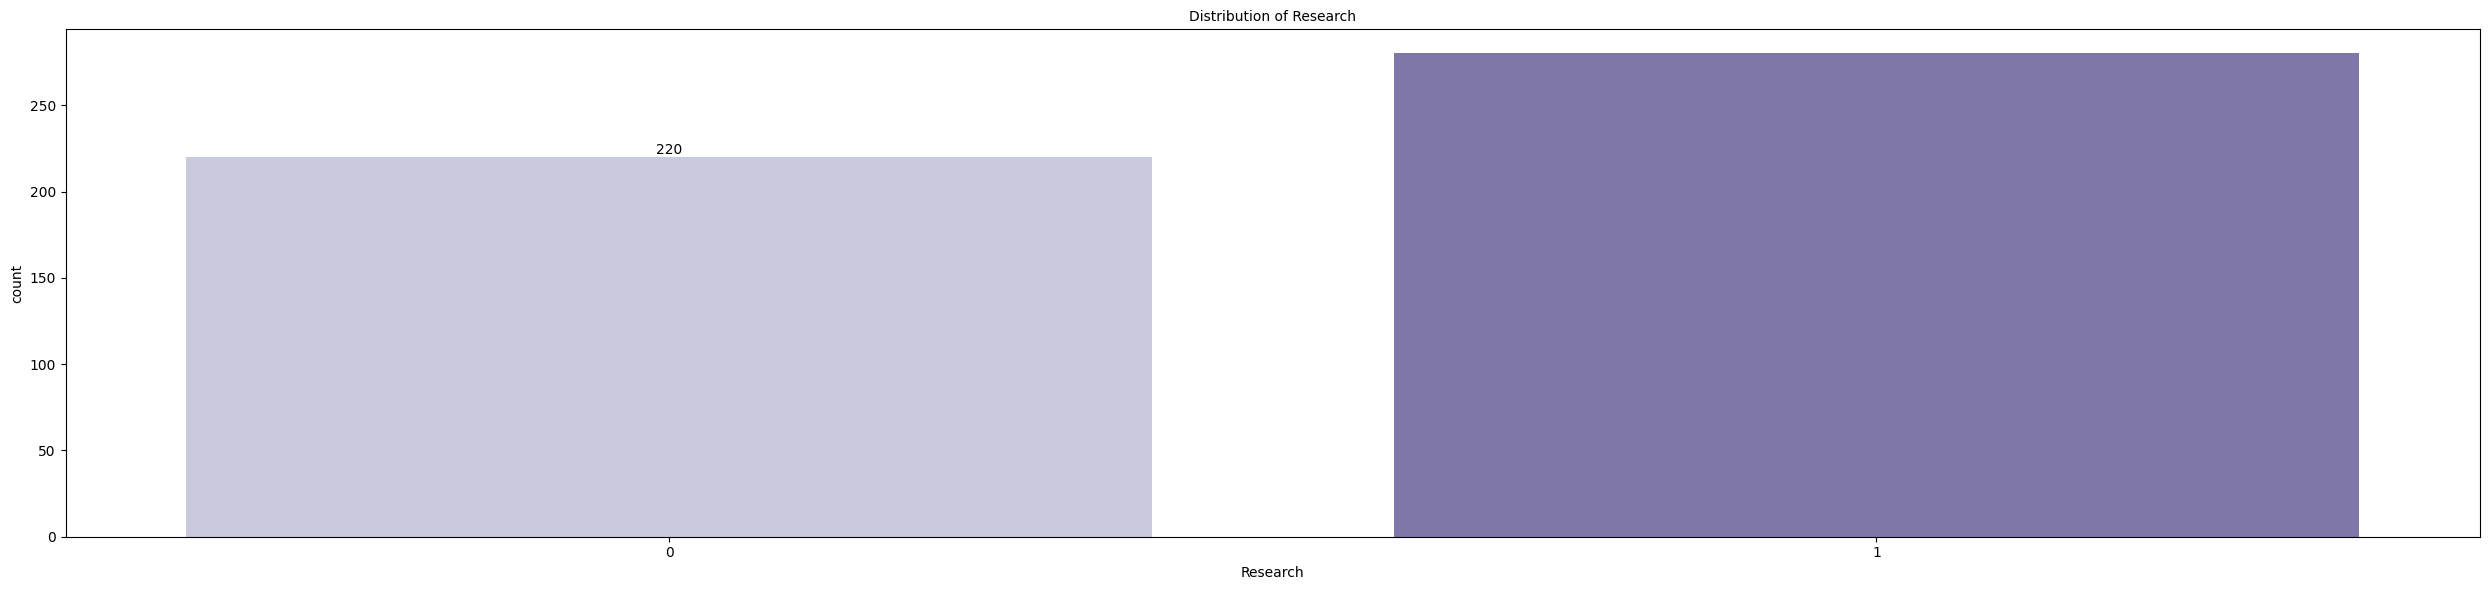

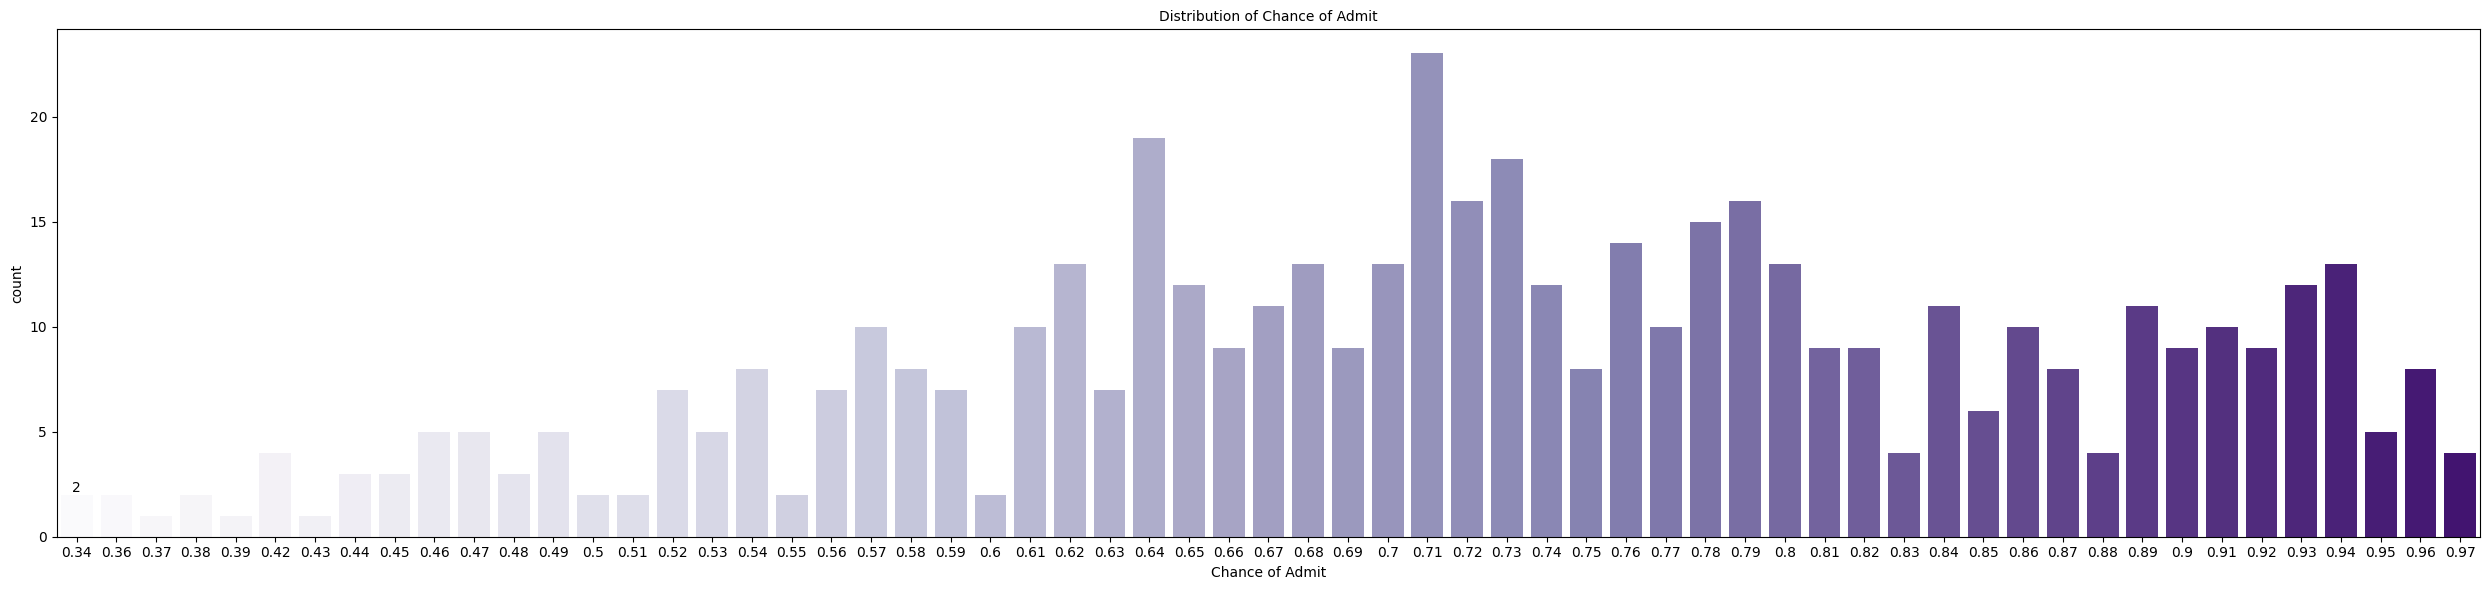

In [124]:
for col in df.columns:
  plt.figure(figsize=(25,6))
  b=sns.countplot(x=df[col],palette='Purples')
  plt.title(f'Distribution of {col}',fontsize=10)
  b.bar_label(b.containers[0],label_type='edge',fmt='%d')
  plt.tight_layout()
  plt.show()

import warnings
warnings.filterwarnings('ignore')

Joint plot of GRE Score vs Chance of Admit


<Figure size 1000x300 with 0 Axes>

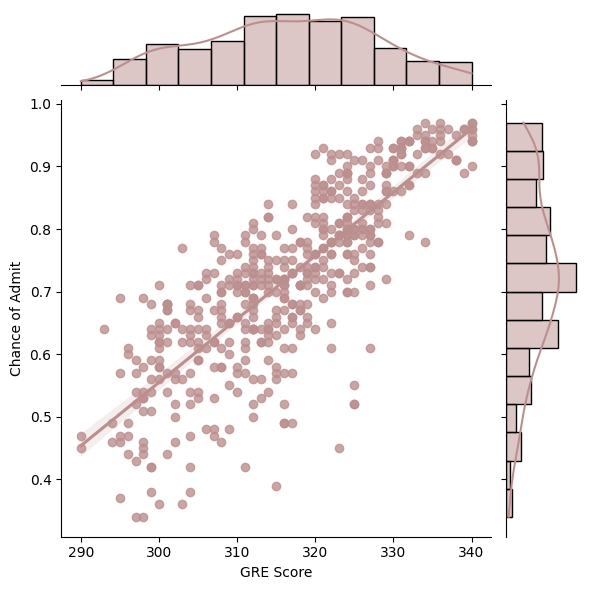

Joint plot of TOEFL Score vs Chance of Admit


<Figure size 1000x300 with 0 Axes>

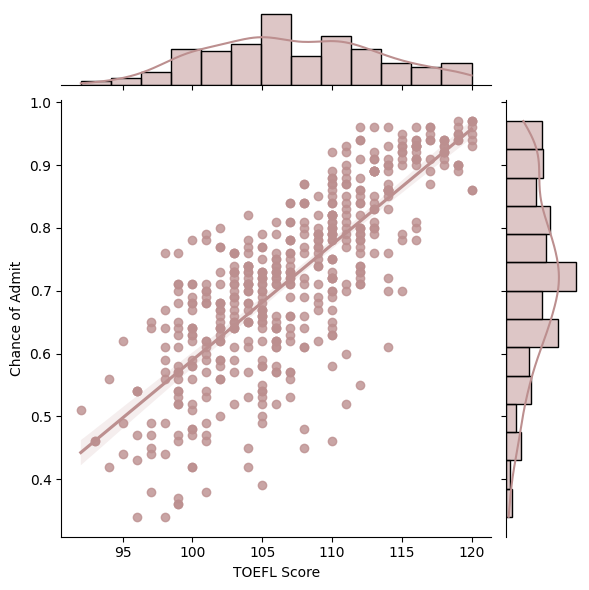

Joint plot of University Rating vs Chance of Admit


<Figure size 1000x300 with 0 Axes>

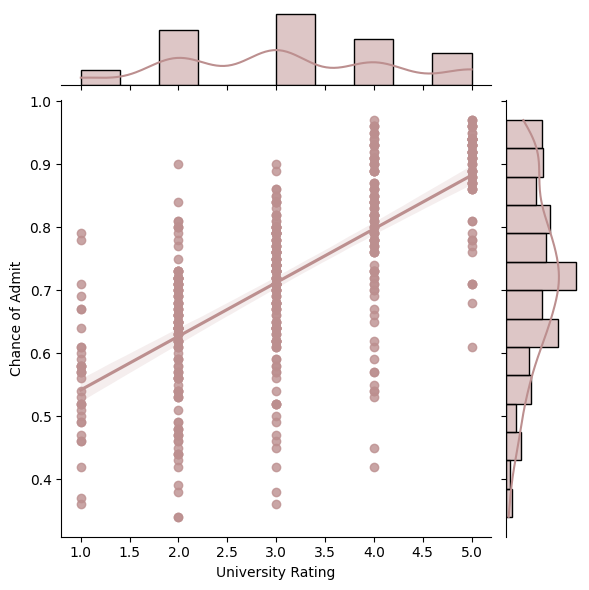

Joint plot of SOP vs Chance of Admit


<Figure size 1000x300 with 0 Axes>

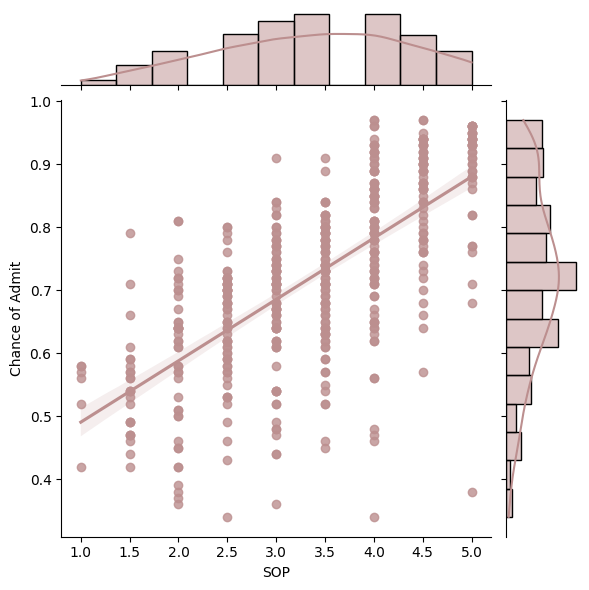

Joint plot of LOR vs Chance of Admit


<Figure size 1000x300 with 0 Axes>

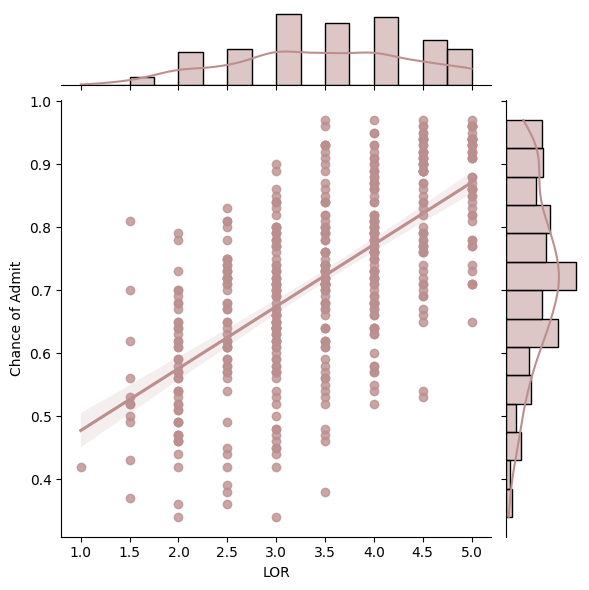

Joint plot of CGPA vs Chance of Admit


<Figure size 1000x300 with 0 Axes>

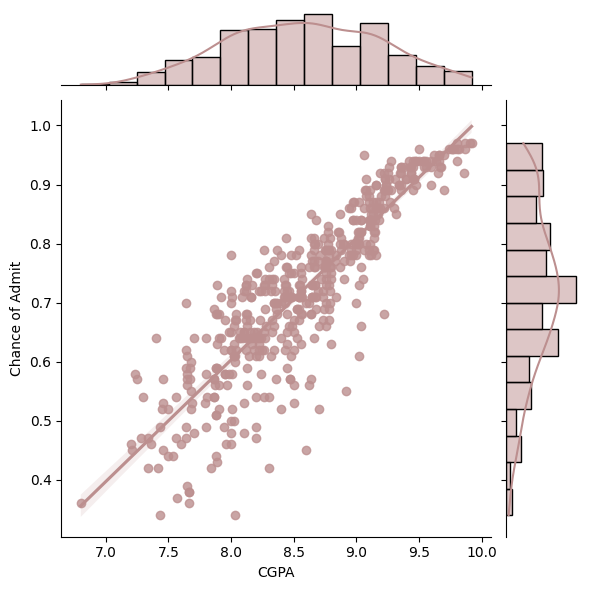

Joint plot of Research vs Chance of Admit


<Figure size 1000x300 with 0 Axes>

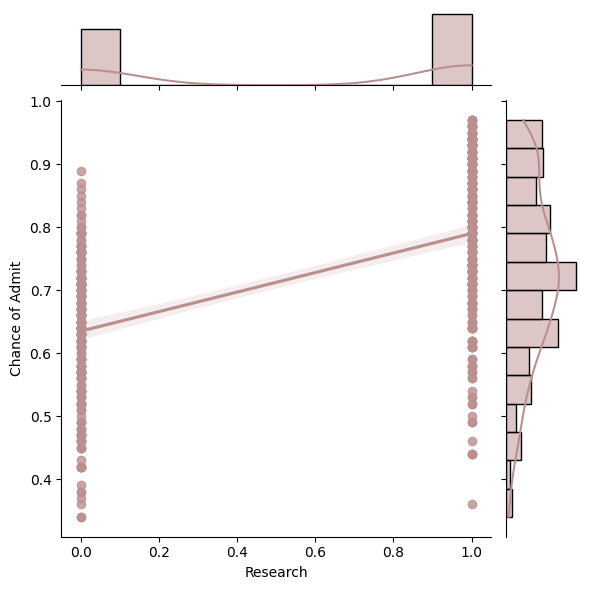

In [125]:
for col in df.columns[:-1]:
  plt.figure(figsize=(10,3))
  print(f'Joint plot of {col} vs Chance of Admit')
  sns.jointplot(data=df,x=col,y='Chance of Admit',kind='reg',color='rosybrown')
  plt.show()

###4. Perform data preprocessing.

○ Check for duplicate records and treat them accordingly if found.

○ Check for missing values and treat them accordingly if found.

○ Check for outlier values and treat them accordingly if found.

In [126]:
df.isna().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [127]:
dups=df.duplicated()
dups.sum()

0

### Insights:
There are no duplicate records in the given Jamboree Dataset

<Axes: ylabel='GRE Score'>

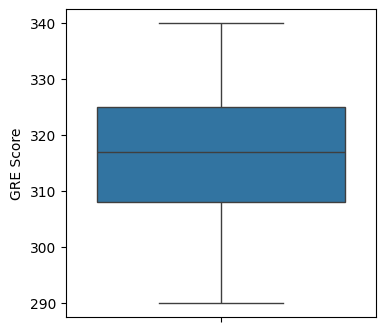

In [128]:
plt.figure(figsize=(4,4))
sns.boxplot(df['GRE Score'])

<Axes: ylabel='TOEFL Score'>

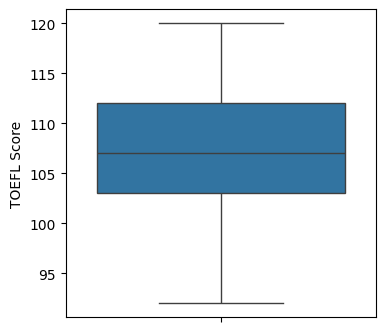

In [129]:
plt.figure(figsize=(4,4))
sns.boxplot(df['TOEFL Score'])

<Axes: ylabel='University Rating'>

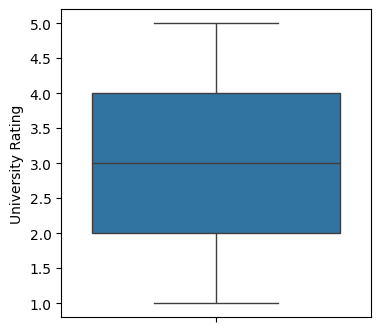

In [130]:
plt.figure(figsize=(4,4))
sns.boxplot(df['University Rating'])

<Axes: ylabel='SOP'>

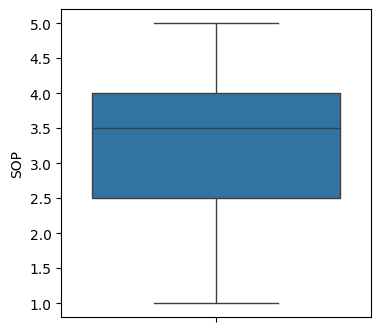

In [131]:
plt.figure(figsize=(4,4))
sns.boxplot(df['SOP'])

<Axes: ylabel='LOR'>

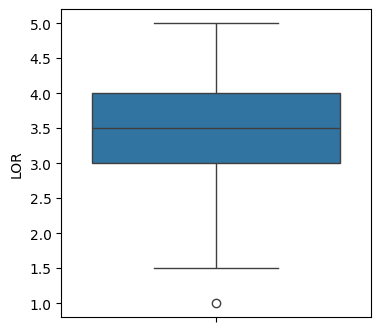

In [132]:
plt.figure(figsize=(4,4))
sns.boxplot(df['LOR'])

<Axes: ylabel='CGPA'>

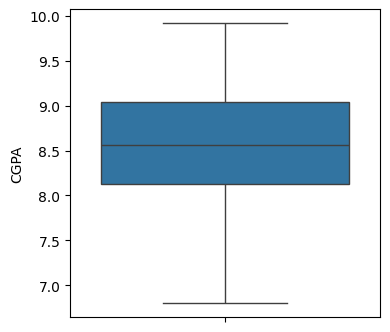

In [133]:
plt.figure(figsize=(4,4))
sns.boxplot(df['CGPA'])

<Axes: ylabel='Research'>

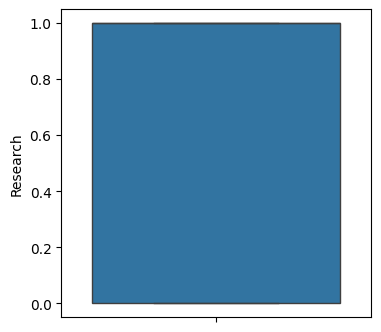

In [134]:
plt.figure(figsize=(4,4))
sns.boxplot(df['Research'])

<Axes: ylabel='Chance of Admit'>

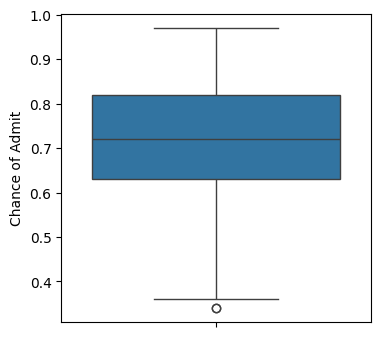

In [135]:
plt.figure(figsize=(4,4))
sns.boxplot(df['Chance of Admit'])

###Insights
No or very very less outlier data points in all features

###5. Check the correlation among independent variables and how they interact with each other.

We want you to create a correlation matrix/heatmap and drop any feature that has a high correlation (>0.90) with some other feature.

In [136]:
correlation_df=df.corr()
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<Axes: >

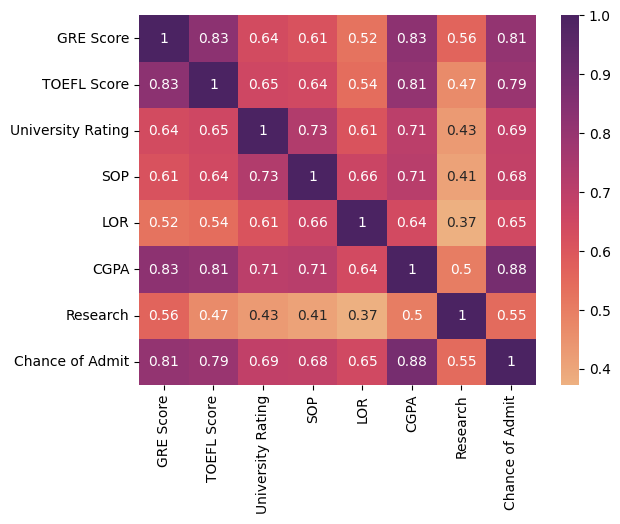

In [191]:
sns.heatmap(correlation_df,annot=True,cmap='flare')

###Insights:
No feature has correlation of >0.90 with any other feature, so dropping no independent features.

###6. Prepare the data for modeling.

○ Encode categorical variables (if any) using a suitable method

○ Perform the train-test split

○ Perform data normalization/standardization

NOTE: Feature scaling should be performed after the train-test split.

In [139]:
y=df['Chance of Admit']
X=df.drop('Chance of Admit',axis=1)

#having a backup of X and y below for future reference:
y_original=y
X_original=X

In [140]:
(X.shape,y.shape)

((500, 7), (500,))

#### Splitting the feature data into Train and Test data to build a model on Train data and use the model evaluator on Test Data

In [141]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

In [142]:
print((x_train.shape,y_train.shape))
print((x_test.shape,y_test.shape))

((400, 7), (400,))
((100, 7), (100,))


#### Scaling the tarin and test data ensuring that the features have values in the same range.

In [143]:
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

x_train = pd.DataFrame(x_train, columns=X.columns)
x_test = pd.DataFrame(x_test, columns=X.columns)

In [144]:
x_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.96,1.000000,0.75,1.00,1.000,0.916667,1.0
1,0.58,0.464286,0.75,0.75,0.875,0.596154,1.0
2,0.26,0.214286,0.00,0.25,0.375,0.272436,0.0
3,0.66,0.750000,0.50,0.75,0.750,0.666667,1.0
4,0.60,0.714286,0.75,0.50,0.875,0.660256,1.0


###7. Build the Linear Regression model.

○ Use Linear Regression from Statsmodel library to create a model and comment
on the model statistics.

○ Also, display model coefficients with column names.

○ Drop columns with p-value > 0.05 (if any) and re-train the model.

##Using Statsmodel

In [157]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [158]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [159]:
y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [160]:
x_trains, x_tests, y_trains, y_tests = train_test_split(X, y, test_size=0.2, random_state=7)

y_trains = np.array(y_trains)

In [161]:
import statsmodels.api as sm

##Model 1 - Statsmodel

In [162]:
x_train_sm = sm.add_constant(x_trains) ## Statmodels is by default without intercept, to add intercept we need to add constant.
x_test_sm = sm.add_constant(x_tests)

model_s = sm.OLS(y_trains, x_train_sm)
result = model_s.fit()

# To obatin the statistical summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     253.6
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          2.79e-141
Time:                        14:27:57   Log-Likelihood:                 554.96
No. Observations:                 400   AIC:                            -1094.
Df Residuals:                     392   BIC:                            -1062.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2934      0.11

In [163]:
y_pred_s1_test=result.predict(x_test_sm)

In [154]:
def model_evaluator(y_actual, y_forecast, model):
  n = len(y_actual)
  if len(model1.coef_.shape)==1:
    d = len(model1.coef_)
  else:
    d = len(model.coef_[0])
  MSE = np.round(mean_squared_error(y_true= y_actual,y_pred = y_forecast,squared=True),2)
  MAE = np.round(mean_absolute_error(y_true=y_actual, y_pred=y_forecast),2)
  RMSE = np.round(mean_squared_error(y_true=y_actual,y_pred=y_forecast, squared=False),2)
  r2 = np.round(r2_score(y_true=y_actual, y_pred=y_forecast),2)
  adj_r2 = np.round(1 - ((1-r2)*(n-1)/(n-d-1)),2)
  return print(f"Mean Squared Error: {MSE}\nMean Absolute Error: {MAE}\nRoot Mean Squared Error: {RMSE}\nR2 Score: {r2}\nAdjusted R2 Score: {adj_r2}")

In [164]:
model_evaluator(y_tests,y_pred_s1_test,result)

Mean Squared Error: 0.0
Mean Absolute Error: 0.04
Root Mean Squared Error: 0.06
R2 Score: 0.83
Adjusted R2 Score: 0.82


####Insights:

* R2 Score and Adjusted R2 Score are very close to each other, indicating that all features are relevant and prominent in determining the target variable, that is the Chance of Admit.

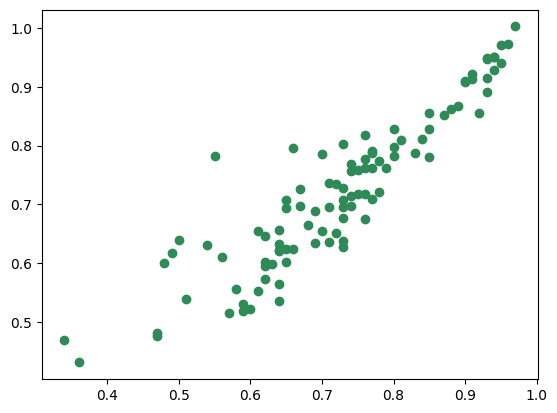

In [165]:
plt.scatter(y_tests,y_pred_s1_test,color='seagreen')

####Insights from Statistical summary of Model 1 - result:
* University Rating and SOP have p-value greater than 0.05.
* SOP- highest --> 0.560, University Rating --> 0.222
* Dropping SOP feature first and retraining the model.

In [166]:
x_trains.drop('SOP',axis=1,inplace=True)

In [167]:
x_tests.drop('SOP',axis=1,inplace=True)
x_tests.head()

,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research
308,312,108,3,3.0,8.53,0
13,307,109,3,3.0,8.00,1
414,321,110,4,4.0,8.35,1
32,338,118,4,4.5,9.40,1
460,319,105,4,4.5,8.66,1


In [168]:
x_trains.head()

,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research
342,308,106,3,3.0,8.24,0
359,321,107,2,1.5,8.44,0
109,304,103,5,4.0,8.64,0
50,313,98,3,4.5,8.30,1
452,328,116,4,3.5,9.60,1


##Model 2 - Statsmodel

In [169]:
x_train_sm2 = sm.add_constant(x_trains) ## Statmodels is by default without intercept, to add intercept we need to add constant.
x_test_sm2 = sm.add_constant(x_tests)

model_s2 = sm.OLS(y_trains, x_train_sm2)
result2 = model_s2.fit()

# To obatin the statistical summary
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     296.3
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          1.84e-142
Time:                        14:27:57   Log-Likelihood:                 554.79
No. Observations:                 400   AIC:                            -1096.
Df Residuals:                     393   BIC:                            -1068.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.3005      0.11

In [170]:
y_pred_s2_train=result2.predict(x_train_sm2)
y_pred_s2_test=result2.predict(x_test_sm2)
model_evaluator(y_tests,y_pred_s2_test,result2)

Mean Squared Error: 0.0
Mean Absolute Error: 0.04
Root Mean Squared Error: 0.06
R2 Score: 0.83
Adjusted R2 Score: 0.82


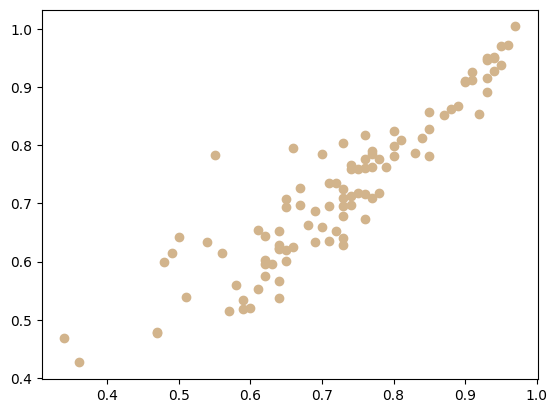

In [171]:
plt.scatter(y_tests,y_pred_s2_test,color='tan')

#### After removing SOP column, the R2 Score and Adjusted R2 Score have remained the same, indicating that SOP column removal did not affect the model otherwise.

University Rating still has p-value greater than 0.05.

University Rating --> 0.120

Dropping University Rating feature as well to check its affect further on score and retraining the model.

In [172]:
x_trains.drop('University Rating',axis=1,inplace=True)
x_tests.drop('University Rating',axis=1,inplace=True)
x_trains.head()

,GRE Score,TOEFL Score,LOR,CGPA,Research
342,308,106,3.0,8.24,0
359,321,107,1.5,8.44,0
109,304,103,4.0,8.64,0
50,313,98,4.5,8.30,1
452,328,116,3.5,9.60,1


##Model 3 - Statsmodel

In [173]:
x_train_sm3 = sm.add_constant(x_trains) ## Statmodels is by default without intercept, to add intercept we need to add constant.
x_test_sm3 = sm.add_constant(x_tests)

model_s3 = sm.OLS(y_trains, x_train_sm3)
result3 = model_s3.fit()

# To obatin the statistical summary
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     353.8
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          3.12e-143
Time:                        14:27:58   Log-Likelihood:                 553.55
No. Observations:                 400   AIC:                            -1095.
Df Residuals:                     394   BIC:                            -1071.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.3508      0.111    -12.148      

In [174]:
y_pred_s3_test=result3.predict(x_test_sm3)
model_evaluator(y_tests,y_pred_s3_test,result3)

Mean Squared Error: 0.0
Mean Absolute Error: 0.04
Root Mean Squared Error: 0.06
R2 Score: 0.83
Adjusted R2 Score: 0.82


There is no change in the Adjusted R2 Score or R2 Score after removal of University rating as well. It implies that the University rating is an not so important feature that has more affect on Chance of Admit.

Now, after re-training, the model coefficients are as follows:

In [176]:
coefficients = result3.params
print("\nModel Coefficients:")
for feature, coef in coefficients.items():
    print(f"{feature}: {coef:.4f}")


Model Coefficients:
const: -1.3508
GRE Score: 0.0018
TOEFL Score: 0.0033
LOR: 0.0166
CGPA: 0.1263
Research: 0.0286


In [177]:
# Create a DataFrame for the coefficients
coefficients = pd.DataFrame(result3.params, columns=['Coefficient'])
coefficients.index.name = 'Feature'
coefficients.reset_index(inplace=True)

# Display the DataFrame
print("\nModel Coefficients with column names:")
print(coefficients)


Model Coefficients with column names:
       Feature  Coefficient
0        const    -1.350842
1    GRE Score     0.001789
2  TOEFL Score     0.003254
3          LOR     0.016609
4         CGPA     0.126296
5     Research     0.028620


###8. Test the assumptions of linear regression.
a. Multicollinearity check by VIF score
* Variables are dropped one-by-one till none has a VIF>5.

b. Mean of residuals should be close to zero.

c. Linear relationship between independent & dependent variables.

This can be checked using the following methods:
* Scatter plots
* Regression plots
* Pearson Correlation

d. Test for Homoscedasticity
* Create a scatterplot of residuals against predicted values.
* Perform a Goldfeld-Quandt test to check the presence of Heteroscedasticity in the data.
* If the obtained p-value>0.05, there is no strong evidence of heteroscedasticity and hence, the presence of Homoscedasticity is validated.

e. Normality of residuals
* Almost bell-shaped curve in residuals distribution.
* Points in the Q-Q plot are almost all on the line.

In [418]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [90]:
X_original.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [91]:
#Multicollinearity check by VIF score

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [178]:
X_original=sm.add_constant(X_original)

In [179]:
vif = pd.DataFrame()
vif['Features'] = X_original.columns
vif['VIF'] = [variance_inflation_factor(X_original.values, i) for i in range(X_original.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1511.50
6,CGPA,4.78
1,GRE Score,4.46
2,TOEFL Score,3.90
4,SOP,2.84
3,University Rating,2.62
5,LOR,2.03
7,Research,1.49


In [180]:
vif1 = vif[vif['Features']!='const']
vif1

,Features,VIF
6,CGPA,4.78
1,GRE Score,4.46
2,TOEFL Score,3.90
4,SOP,2.84
3,University Rating,2.62
5,LOR,2.03
7,Research,1.49


Constant column will always have high VIF factor; Since there are no other features having VIF>5, Significant Multicollinearity does not exist in the dataset. Based on the above VIF table, we can say that the Feature columns do not exhibit Multicollinearity.

####Mean of residuals

In [181]:
#Using Statmodel3's output:

residuals = y_tests.values - y_pred_s3_test.values
residuals.mean()

0.002072895103648819

Text(0.5, 1.0, 'Residuals Test Histogram')

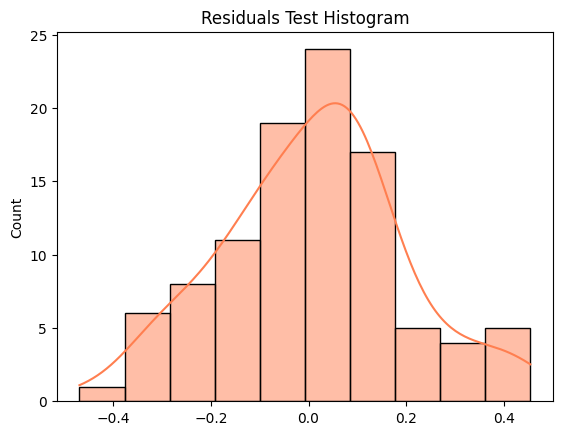

In [510]:
sns.histplot(residuals,kde=True,color='coral')
plt.title('Residuals Test Histogram')

####The Residuals Mean value is very close to 0, hence the model is not biased.

####Linear relationship between independent & dependent variables.

This can be checked using the following methods:

Scatter plots/ Regression plots/ Pearson Correlation

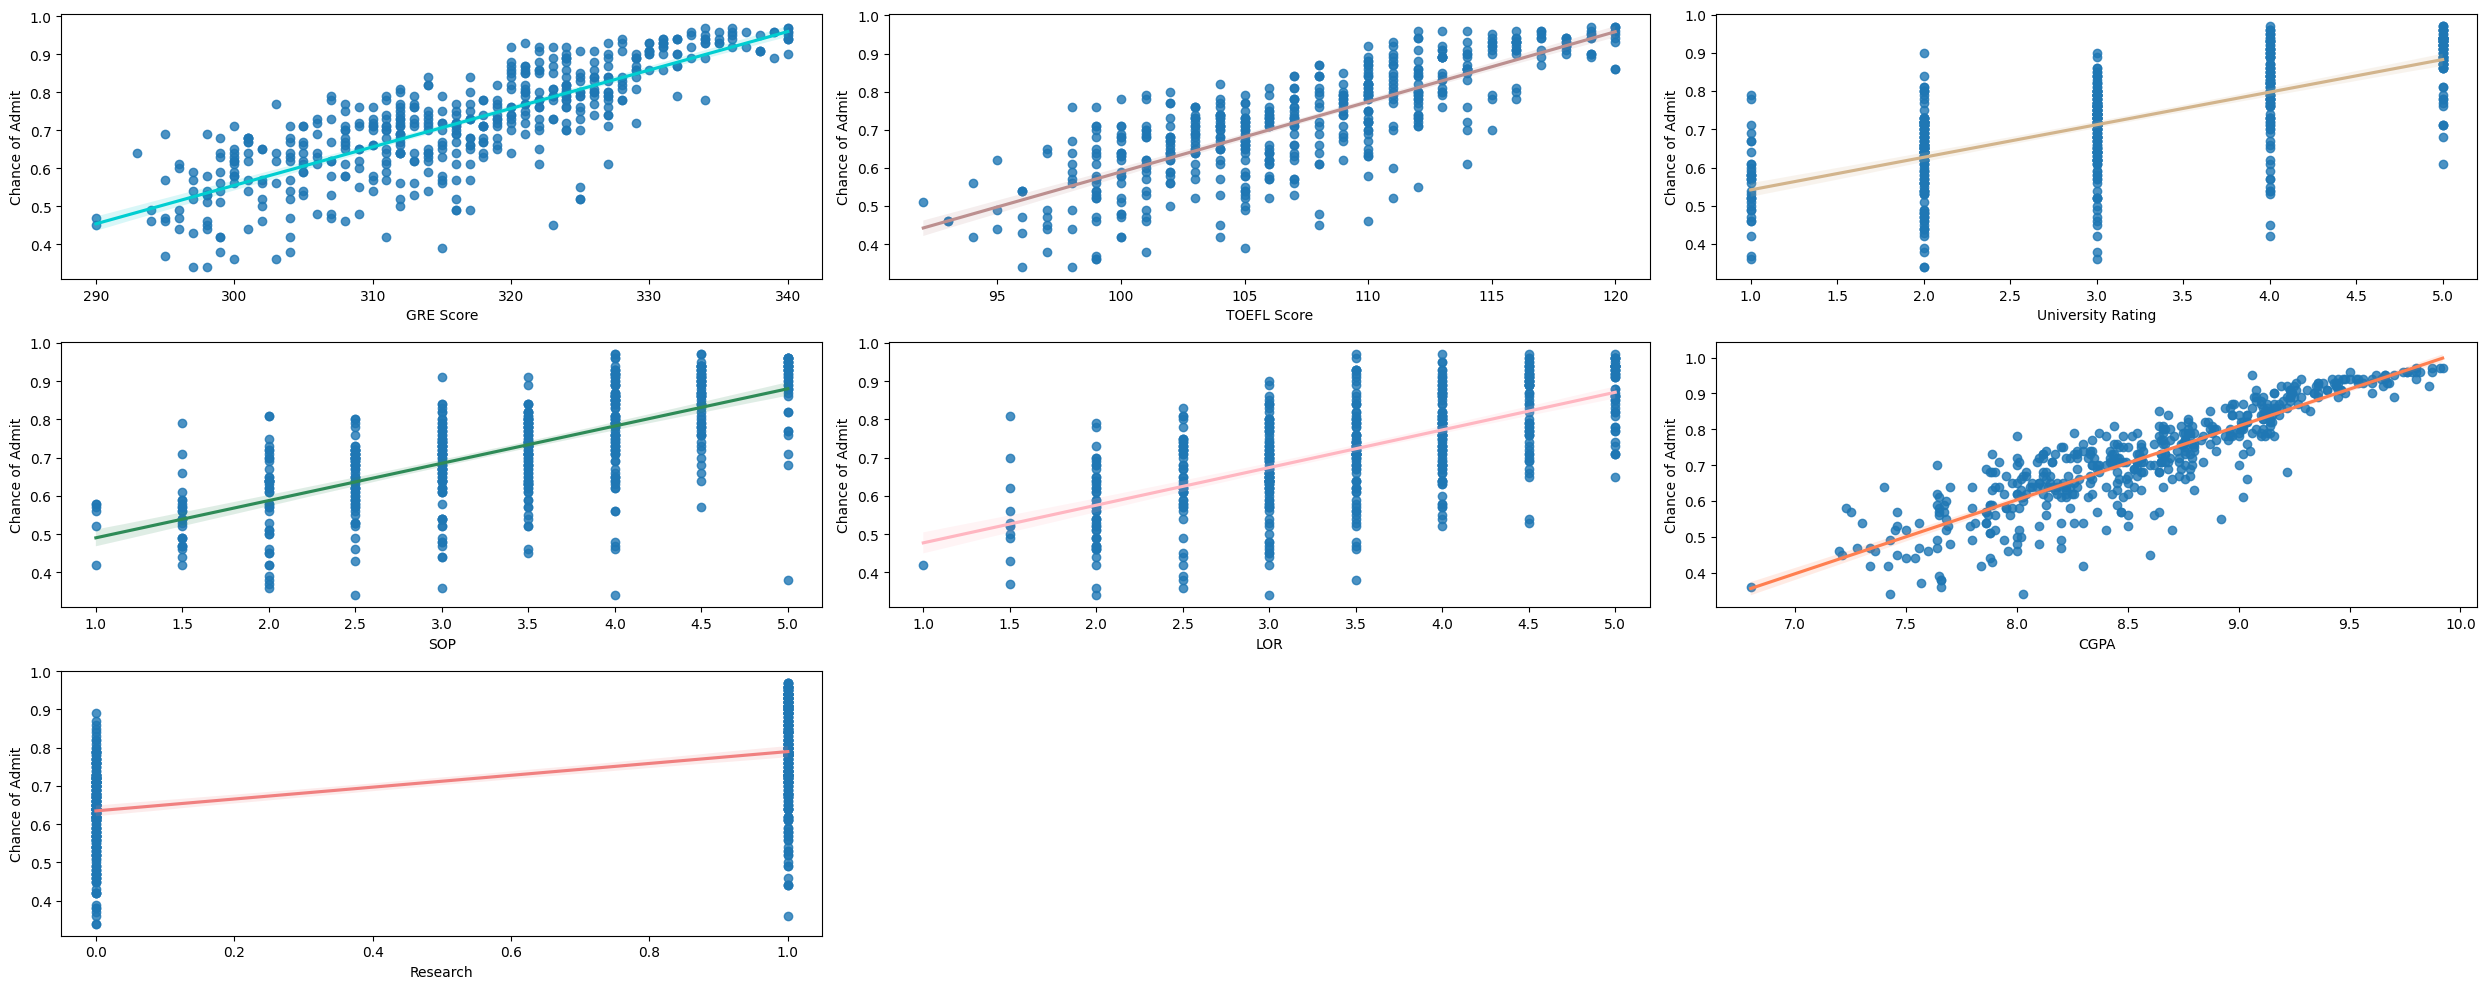

In [518]:
plt.figure(figsize=(25,10))
plt.subplot(331)
sns.regplot(data=df, x='GRE Score', y='Chance of Admit', line_kws={"color":"darkturquoise"})
plt.subplot(332)
sns.regplot(data=df, x='TOEFL Score', y='Chance of Admit', line_kws={"color":"rosybrown"})
plt.subplot(333)
sns.regplot(data=df, x='University Rating', y='Chance of Admit', line_kws={"color":"tan"})
plt.subplot(334)
sns.regplot(data=df, x='SOP', y='Chance of Admit', line_kws={"color":"seagreen"})
plt.subplot(335)
sns.regplot(data=df, x='LOR', y='Chance of Admit', line_kws={"color":"lightpink"})
plt.subplot(336)
sns.regplot(data=df, x='CGPA', y='Chance of Admit', line_kws={"color":"coral"})
plt.subplot(337)
sns.regplot(data=df, x='Research', y='Chance of Admit', line_kws={"color":"lightcoral"})
plt.tight_layout()
plt.show()

In [183]:
correlation_matrix=df.corr(method='pearson')['Chance of Admit']
correlation_matrix.sort_values(ascending=False)

,Chance of Admit
Chance of Admit,1.000000
CGPA,0.882413
GRE Score,0.810351
TOEFL Score,0.792228
University Rating,0.690132
SOP,0.684137
LOR,0.645365
Research,0.545871


#####It is observed that CGPA, GRE Score, TOEFL Score have the highest correlation and linear relationship with Chance of Admit.

####Test for Homoscedasticity

Create a scatterplot of residuals against predicted values.

Perform a Goldfeld-Quandt test to check the presence of Heteroscedasticity in the data.

If the obtained p-value>0.05, there is no strong evidence of heteroscedasticity and hence, the presence of Homoscedasticity is validated.

<Axes: xlabel='None'>

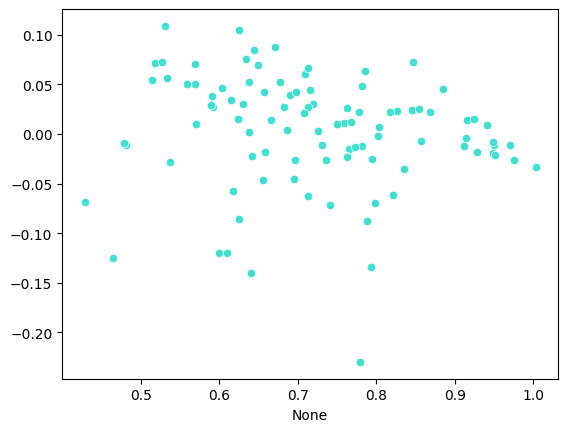

In [184]:
sns.scatterplot(x=y_pred_s3_test, y=residuals, color='turquoise')

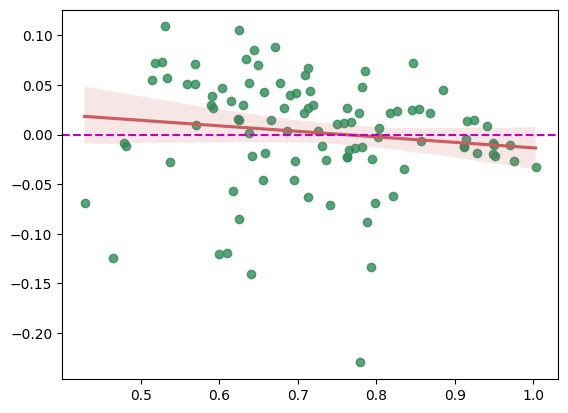

In [182]:
sns.regplot(x=y_pred_s3_test, y=residuals, line_kws={'color': 'indianred'},color='seagreen')
plt.axhline(y=0, color='m', linestyle='--')

In [185]:
from statsmodels.stats.diagnostic import het_goldfeldquandt
het_goldfeldquandt(y_trains, x_train_sm3, alternative='decreasing')

(0.7973822464173175, 0.057843794509228566, 'decreasing')

#####p-value as calculated above is slightly greater than 0.05, hence concluding that there is homoscedasticity present in the model.
The graph above shows outliers present in the model to certain extent, but overall, there is homoscedasticity present.

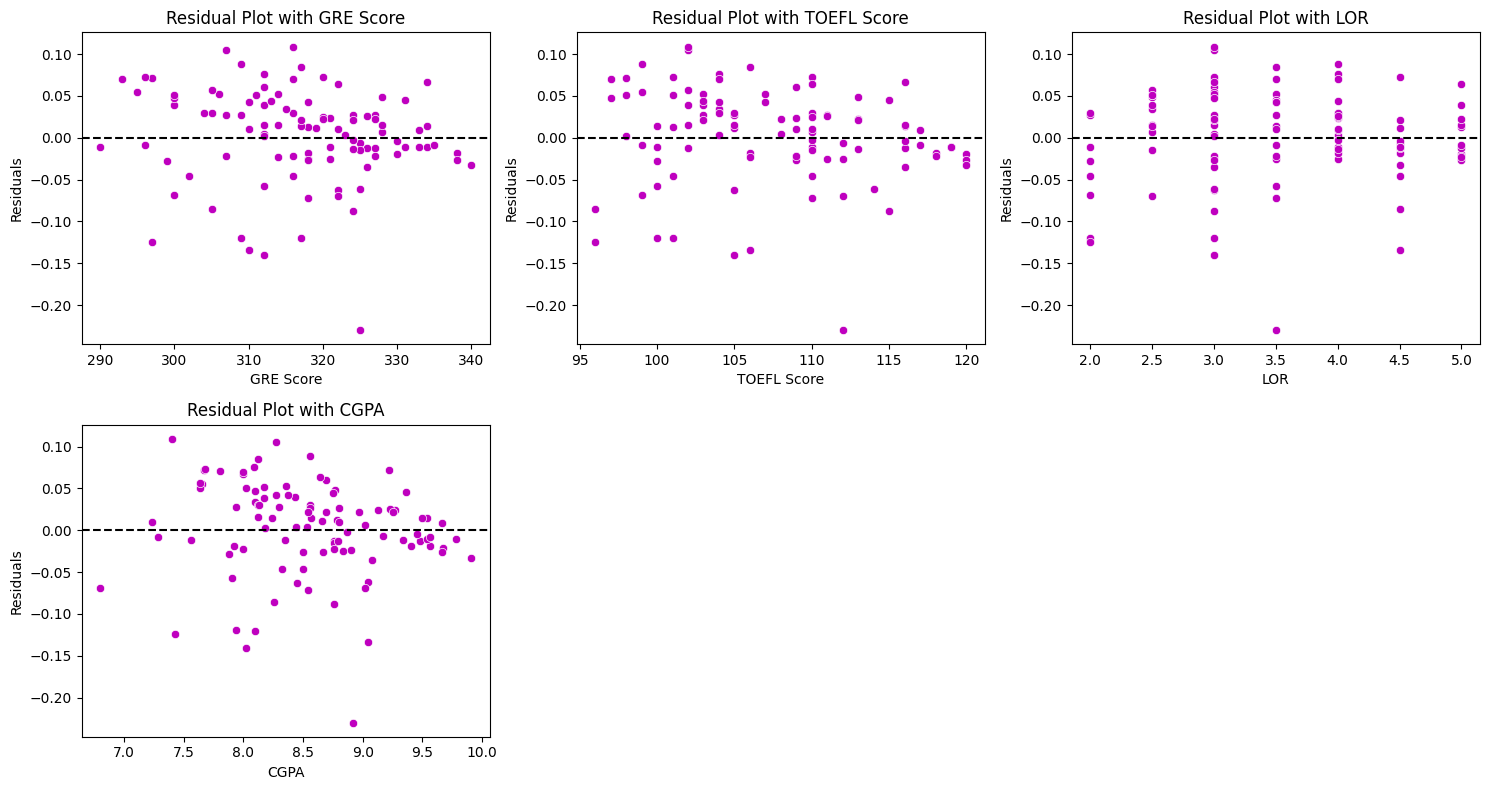

In [186]:
plt.figure(figsize=(15,8))
i=1
for col in x_tests.columns[:-1]:
  plt.subplot(2,3,i)
  sns.scatterplot(x=x_tests[col].values.reshape((-1,)), y=residuals.reshape((-1,)),color='m')
  plt.axhline(y=0, color='k', linestyle='--')
  plt.title(f'Residual Plot with {col}')
  plt.xlabel(col)
  plt.ylabel('Residuals')
  i+=1
plt.tight_layout()
plt.show()

####Normality of residuals

Almost bell-shaped curve in residuals distribution.

Points in the Q-Q plot are almost all on the line.

<Axes: ylabel='Count'>

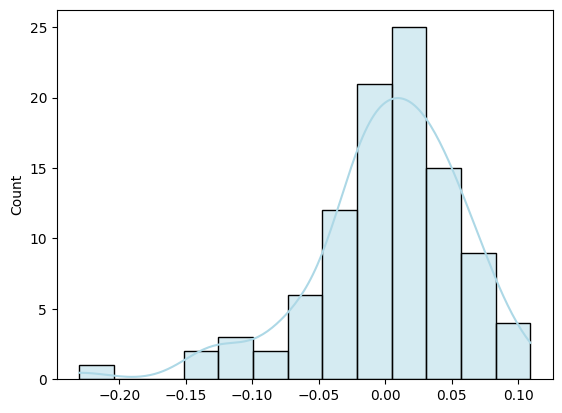

In [187]:
sns.histplot(residuals, kde=True, color='lightblue')

#### To test for normality, Using Shapiro wilk Test:

H0 --> The data is normally distributed

Ha --> The data is not normally distributed.

In [188]:
from scipy.stats import shapiro
import statsmodels.api as sm

In [189]:
shapiro(residuals)

ShapiroResult(statistic=0.937693871354726, pvalue=0.00013984163445228734)

#### p-value from the Shapiro test is very low (lower than alpha --> 0.05, Hence Null hypothesis is rejected. Henece, it is clear that the model residuals does not follow Normal distribution.

<Figure size 1000x400 with 0 Axes>

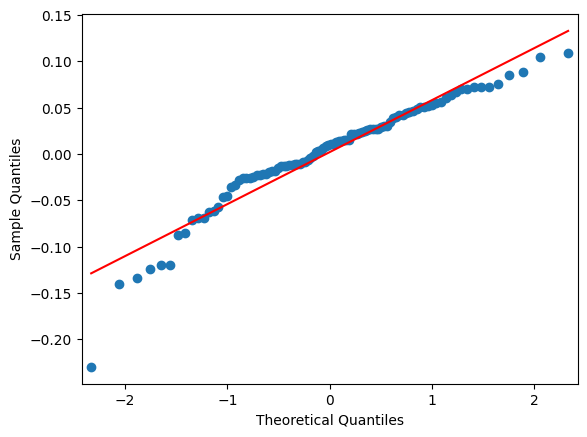

In [190]:
plt.figure(figsize=(10,4))
sm.qqplot(residuals,line='s')
plt.show()

#### We can observe from the QQ plot as well that the residuals are slightly deviating from the diagonal line.

### Trying to model with Linear Regression:

##Model - Linear Regression

In [ ]:
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [ ]:
model1.coef_

array([ 0.10496517,  0.08690509,  0.04308533, -0.01045878,  0.06948068,
        0.34708765,  0.0210215 ])

In [ ]:
model1.intercept_

0.348297066202057

In [ ]:
model1.score(x_train,y_train)

0.8221926136662392

In [ ]:
model1.score(x_test,y_test)

0.8136511545271747

In [ ]:
y_pred_test=model1.predict(x_test)
y_pred_train=model1.predict(x_train)

In [ ]:
model_weights1=pd.DataFrame(model1.coef_.reshape(1,-1),columns=df.columns[:-1])
model_weights1['Intercept']=model1.intercept_
model_weights1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.104965,0.086905,0.043085,-0.010459,0.069481,0.347088,0.021022,0.348297


Insights:

CGPA, GRE Score, TOEFL Score have the highest weights.

W0 --> Intercept = 0.34827

SOP, Research, University Rating have the lowest weights.

In [ ]:
model_evaluator(y_train.values,y_pred_train,model1)

Mean Squared Error: 0.0
Mean Absolute Error: 0.04
Root Mean Squared Error: 0.06
R2 Score: 0.82
Adjusted R2 Score: 0.82


In [ ]:
model_evaluator(y_test.values,y_pred_test,model1)

Mean Squared Error: 0.0
Mean Absolute Error: 0.04
Root Mean Squared Error: 0.06
R2 Score: 0.81
Adjusted R2 Score: 0.8


##Insights:

Dataset feature properties and Relationship:

* There are a total of 500 data points, meaning, 500 unique applicants in the Jamboree dataset.
* The applicants have around 7 independent features like GRE Score, TOEFL Score, CGPA, Research flag, and one Target variable to determine what is the chance of Admit of the applicant into Ivy league school.
* The Chance of Admit is linearly related to GRE Score, TOEFL Score and CGPA features.
* The applicants who have good Research experience prior to applying have a good chance of getting Admission into the Ivy school.

Regression Model Features and results:

* GRE Score, TOEFL Score and CGPA features have high coefficients in the model, proving that they are the most prominent and important features that affect the Chance of Admit the most.
* Observing the results of the Regression analysis, CGPA feature is identified as the most influential feature in determining the Chance of Admission of an applicant into Ivy School.
* The Letter of recommendation (LOR) is a Plus for applicants, which has a positive impact on increasing the Chance of Admission.
* SOP and University Rating have the lowest impact on the target variable - Chance of Admit.

Model Performance:

* From the Stats model Analysis, we see that the Model Adjusted R2 score is approximately 82%, which is a good model and captures 82% of the Variance in Chance of Admission.

Linear Regression Assumptions Tests:

* Variance Inflation factor (VIF) scores of all relevant features were lesser than 5, indicating that there is no Multicollinearity present between the feature variables.
* The mean of residuals was found out to be 0.002, which is very close to 0, which says that the model has predicted the "Line of Best Fit".
* The features GRE Score, TOEFL Score, CGPA have prominent linear relationship with the target - Chance of Admit.
* The graphical analysis of Residuals and the Target data and the Goldfeld Quandt test proved that there low or almost no Heteroscedasticity.
* From the QQ plots and the Shapiro Wilk test, it is evident that the residuals do no follow Normal distribution
* All the features have moderate to High Positive correlation with the target - Chance of Admit.


##Recommendations

* Jamboree should ask the applicants to focus on increasing their CGPA since it is the most Crucial factor in increasing the chance of Ivy Admission.
* Applicants should have their GRE score more than 330 and TOEFL Score more than 115 to obtain more than 85% chance of getting into desired good Ivy School.
* SOP Feature data collection can be ignore since it has the least effect on the Target variable, that is determining the chance of Admission.
* Applicants can additionally enrich their Research experience and get best letter of recommendations to increase their Chance of Admission.